#**PROYECTO SEMESTRAL 2023-2**
```
Curso      : Aprendizaje Automático
Docente    : Robert Wilbert Alzamora Paredes
Nro Grupo  : 1
Integrantes:                                      
1.   Campos Segovia, Jefferson Lennart
2.   Espirilla Machaca Joseph Ode
3.   Huaman Quispe, Andy Marcelo

```


## **Importación de Librerías**

In [1]:
# Librerias Generales
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import pickle
from skimage import io
import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import matplotlib.pyplot as plt
# Librerías para métricas
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Librería para Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Módulo KNeighborsClassifier: Implementa K-NN para clasificación
from sklearn.neighbors import KNeighborsClassifier
# Librerías para Árbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Librerias para Support Vector Machine
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Libreria para Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
# Librerias para CNN
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

2024-02-03 23:51:40.696045: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-03 23:51:40.696175: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-03 23:51:40.860746: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## **Cargar la Data**



**Tuberculos**

In [2]:
# Recuperar los archivos binarios
file_images_tuberculos_color = open('/kaggle/input/datatuberculoscortes/images_tuberculos_color.dat','rb')
file_images_tuberculos_gray = open('/kaggle/input/datatuberculoscortes/images_tuberculos_gray.dat','rb')
file_labels_tuberculos = open('/kaggle/input/datatuberculoscortes/labels_tuberculos.dat','rb')
file_label_encoder_tuberculos = open('/kaggle/input/datatuberculoscortes/label_encoder_tuberculos.dat','rb')

# Recuperar los datos
images_tuberculos_color = pickle.load(file_images_tuberculos_color)
images_tuberculos_gray = pickle.load(file_images_tuberculos_gray)
labels_tuberculos = pickle.load(file_labels_tuberculos)
label_encoder_tuberculos = pickle.load(file_label_encoder_tuberculos)

# Cerrar archivos
file_images_tuberculos_color.close()
file_images_tuberculos_gray.close()
file_labels_tuberculos.close()
file_label_encoder_tuberculos.close()

**Cortes**

In [3]:
# Recuperar los archivos binarios
file_images_cortes_color = open('/kaggle/input/datatuberculoscortes/images_cortes_color.dat','rb')
file_images_cortes_gray = open('/kaggle/input/datatuberculoscortes/images_cortes_gray.dat','rb')
file_labels_cortes = open('/kaggle/input/datatuberculoscortes/labels_cortes.dat','rb')
file_label_encoder_cortes = open('/kaggle/input/datatuberculoscortes/label_encoder_cortes.dat','rb')

# Recuperar los datos
images_cortes_color = pickle.load(file_images_cortes_color)
images_cortes_gray = pickle.load(file_images_cortes_gray)
labels_cortes = pickle.load(file_labels_cortes)
label_encoder_cortes = pickle.load(file_label_encoder_cortes)

# Cerrar archivos
file_images_cortes_color.close()
file_images_cortes_gray.close()
file_labels_cortes.close()
file_label_encoder_cortes.close()

## **Mostrar una muestra aleatoria de imagenes**



In [4]:
''' Función para mostrar 6 imagenes aleatoriamente
    Parámetros:
                images       : lista de imagenes
                label_encoder: objeto de LabelEncoder
                labels       : Lista de etiquetas ya procesadas con LabelEncoder
'''
def mostrar_data(images, label_encoder, labels):
  nro_images = len(images)

  # Definir el tamaño de la figura
  plt.figure(figsize=(8, 8))
  # Iterar sobre los datos
  for i in range(6):
      # Definir subplots
      plt.subplot(2, 3, i + 1)

      # numero aleatorio para mostrar imagenes aleatoriamente
      ran = random.randint(0, nro_images)

      # Mostrar la imagen
      plt.imshow(images[ran], cmap='gray')

      # Configurar título y etiquetas de ejes
      plt.title( label_encoder.inverse_transform([labels[ran]])[0] )
      plt.xticks([]), plt.yticks([])

  # Ajustar el diseño y mostrar la figura
  plt.tight_layout()
  plt.show()

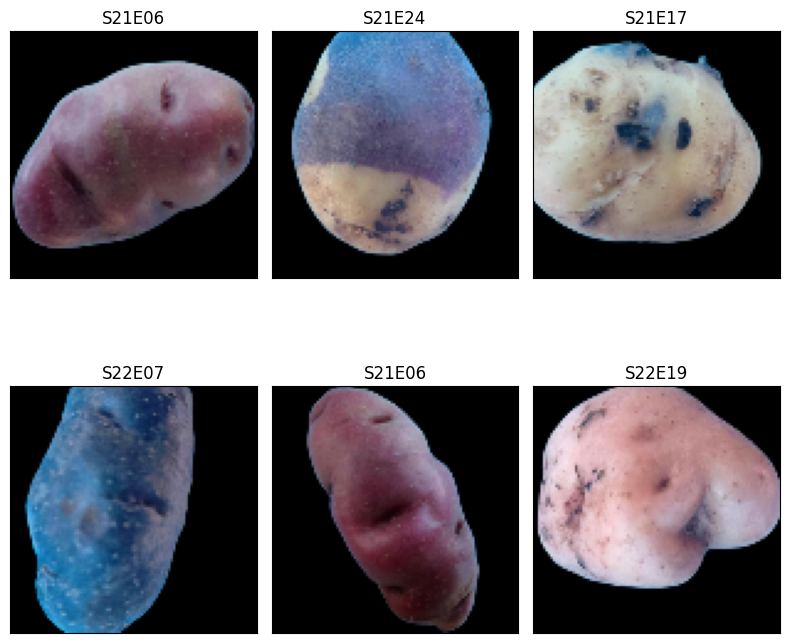

In [5]:
# Mostrar imagenes a color de tuberculos
mostrar_data(images_tuberculos_color, label_encoder_tuberculos, labels_tuberculos)

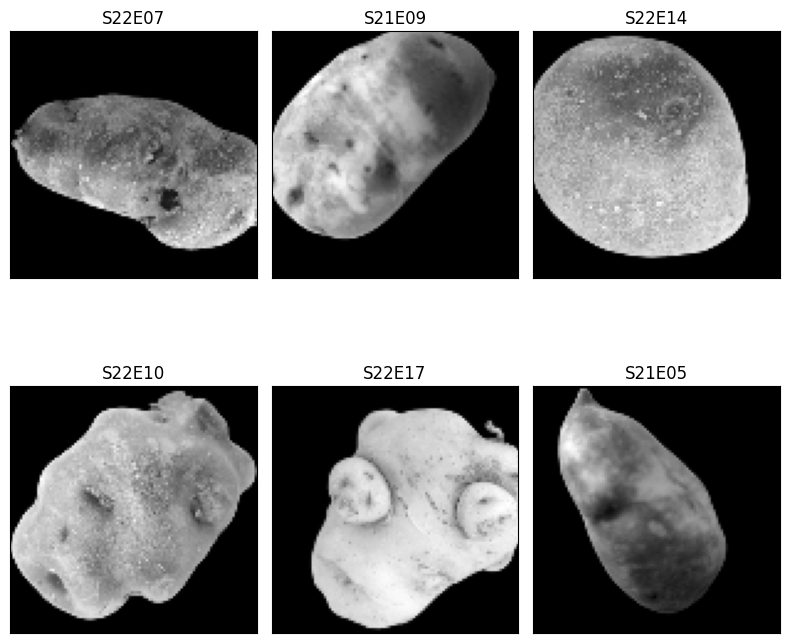

In [6]:
# Mostrar imagenes a color de tuberculos
mostrar_data(images_tuberculos_gray, label_encoder_tuberculos, labels_tuberculos)

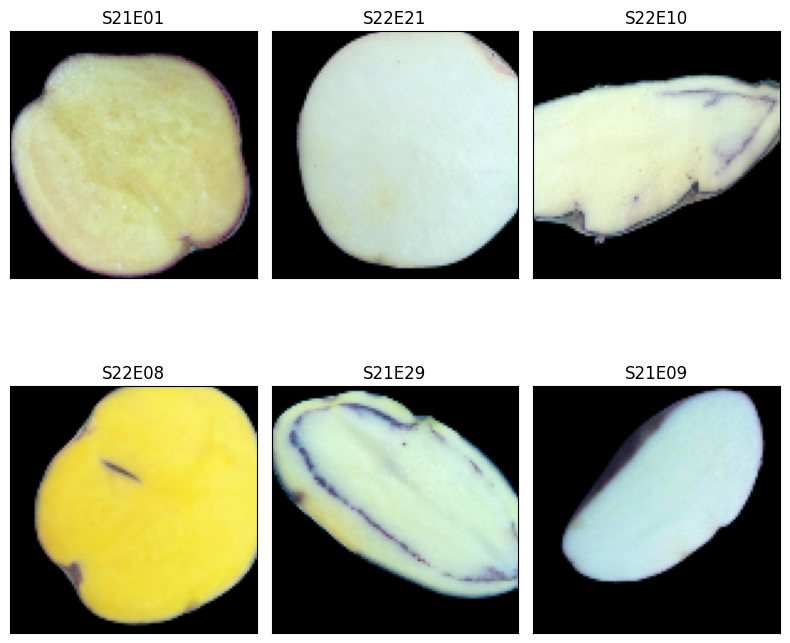

In [7]:
# Mostrar imagenes en escala de grises de cortes
mostrar_data(images_cortes_color, label_encoder_cortes, labels_cortes)

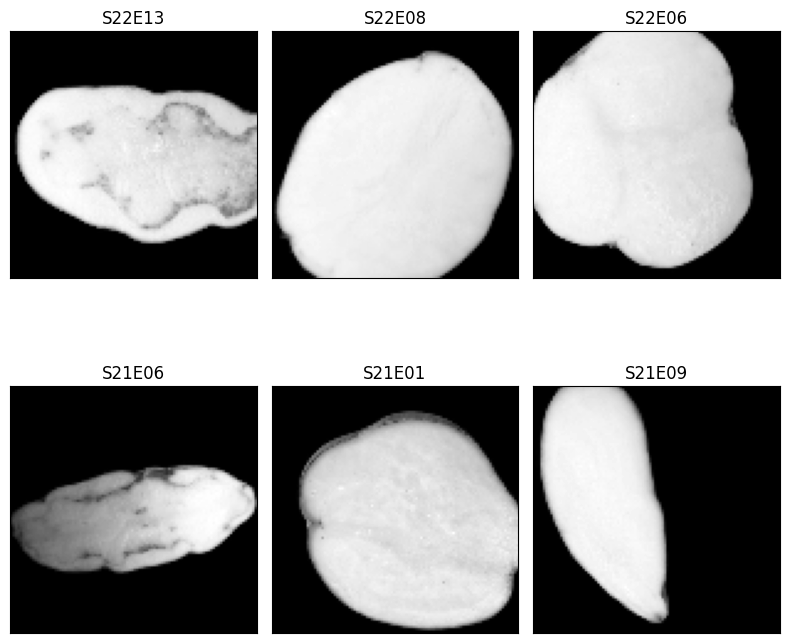

In [8]:
# Mostrar imagenes en escala de grises de cortes
mostrar_data(images_cortes_gray, label_encoder_cortes, labels_cortes)

## **Formato de los datos**

### **Para algoritmos de clasificación convencionales**

In [9]:
# Función para dar formato al dataset para algoritmos de clasificación convencionales
def formato_normal(images):
  # Aplanar la imagen (matriz)
  images = [x.ravel() for x in images]
  # Transformar la lista de images a un matriz donde cada fila es una imagen
  images = np.array(images)
  return images

In [10]:
# Dar formato a las imagenes a color de tuberculos
images_tuberculos_color = formato_normal(images_tuberculos_color)
images_tuberculos_color.shape

(3600, 30000)

In [11]:
# Dar formato a las imagenes a color de cortes
images_cortes_color = formato_normal(images_cortes_color)
images_cortes_color.shape

(3600, 30000)

In [12]:
# Dar formato a las imagenes a escala de grises de tuberculos
images_tuberculos_gray = formato_normal(images_tuberculos_gray)
images_tuberculos_gray.shape

(3600, 10000)

In [13]:
# Dar formato a las imagenes a escala de grises de cortes
images_cortes_gray = formato_normal(images_cortes_gray)
images_cortes_gray.shape

(3600, 10000)

### **Para algoritmos de clasificación basados en redes neuronales**

## **Preprocesamiento: Normalización**

In [14]:
images_tuberculos_color = images_tuberculos_color / 255.0
images_cortes_color = images_cortes_color / 255.0
images_tuberculos_gray = images_tuberculos_gray / 255.0
images_cortes_color = images_cortes_color / 255.0

## **Separación de Datos para Entrenamiento y Pruebas en Grises**

# Escala de Grises

TUBERCULOS

In [15]:
# Separa datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(images_tuberculos_gray, labels_tuberculos,   random_state=3, train_size=0.8)

CORTES

In [16]:
# Separa datos en entrenamiento y test
A_train, A_test, b_train, b_test = train_test_split(images_cortes_gray, labels_cortes, random_state=3, train_size=0.8)

# RGB

TUBERCULOS

In [17]:
# Separa datos en entrenamiento y test
XC_train, XC_test, yc_train, yc_test = train_test_split(images_tuberculos_color, labels_tuberculos,   random_state=3, train_size=0.8)

CORTES

In [18]:
# Separa datos en entrenamiento y test
AC_train, AC_test, bc_train, bc_test = train_test_split(images_cortes_color, labels_cortes, random_state=3, train_size=0.8)

## **Entrenamientos y Tests**

# Escala de Grises

### **KNN**

TUBERCULOS

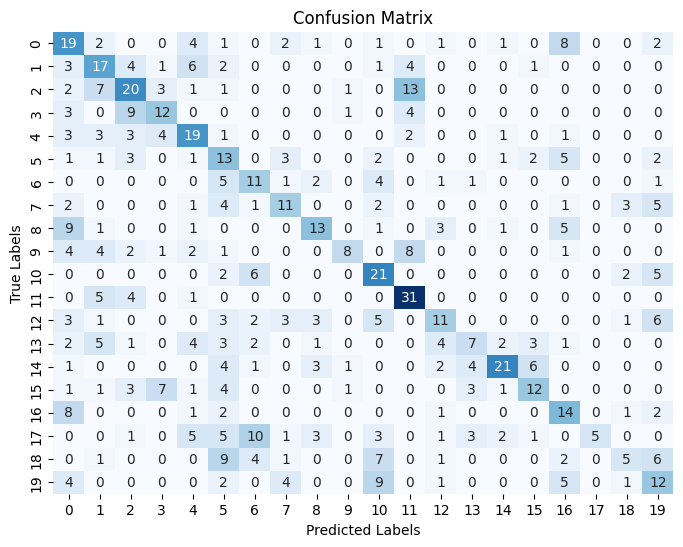


Precision: 0.4477933019160976
Recall: 0.39166666666666666
F1-Score: 0.3834578836412982
Exactitud: 0.39166666666666666


In [19]:
# Definición del modelo
Modelo = KNeighborsClassifier(n_neighbors=3)

# Entrenamiento del modelo
Modelo.fit(X_train, y_train)

# Test del modelo
y_pred = Modelo.predict(X_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular precision, recall y exactitud
reporte_clasificacion = classification_report(y_test, y_pred, zero_division=1, output_dict=True)

# Mostrar los resultados
print('\nPrecision:', reporte_clasificacion['weighted avg']['precision'])
print('Recall:', reporte_clasificacion['weighted avg']['recall'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])
print('Exactitud:', Modelo.score(X_test, y_test))


CORTES


Precision: 0.41199984360177155
Recall: 0.2972222222222222
F1-Score: 0.28932878811400137
Exactitud: 0.2972222222222222


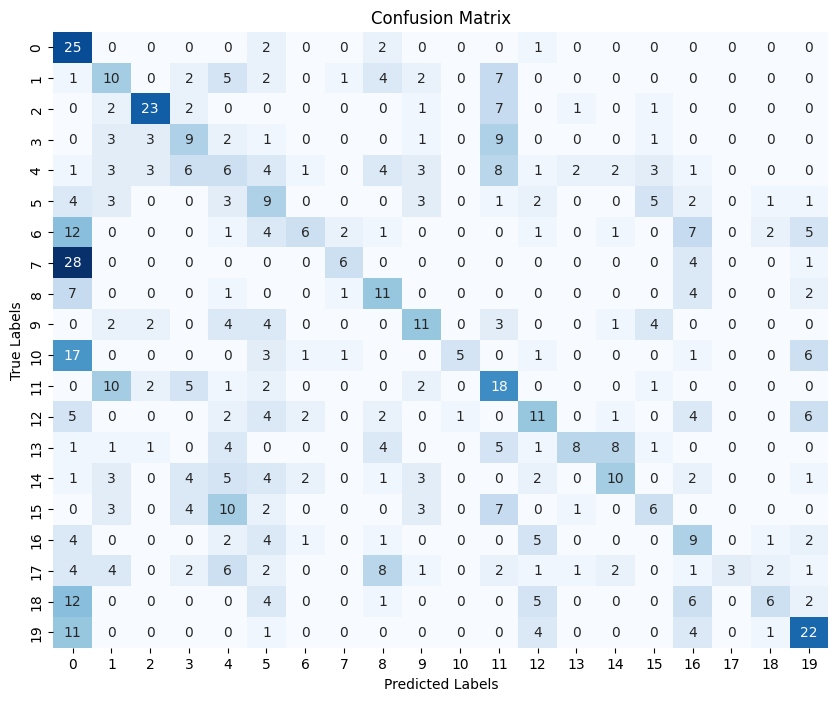

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Definición del modelo
Modelo = KNeighborsClassifier(n_neighbors=5)

# Entrenamiento del modelo
Modelo.fit(A_train, b_train)

# Test del modelo
b_pred = Modelo.predict(A_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(b_test, b_pred)

# Calcular precision, recall, F1-score y exactitud
reporte_clasificacion = classification_report(b_test, b_pred, zero_division=1, output_dict=True)

print('\nPrecision:', reporte_clasificacion['weighted avg']['precision'])
print('Recall:', reporte_clasificacion['weighted avg']['recall'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])
print('Exactitud:', Modelo.score(A_test, b_test))

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# RGB

### KNN

TUBERCULOS

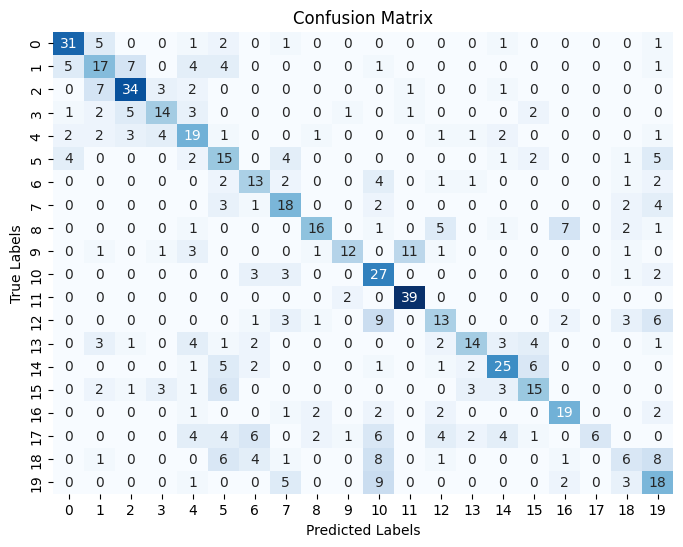


Recall: 0.5152777777777777
Precision: 0.554108302708633
F1-Score: 0.5056940372323049
Exactitud: 0.5152777777777777


In [21]:
# Definición del modelo
Modelo = KNeighborsClassifier(n_neighbors=5)

# Entrenamiento del modelo
Modelo.fit(XC_train, yc_train)

# Test del modelo
yc_pred = Modelo.predict(XC_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(yc_test, yc_pred)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular recall, precision, f1-score y exactitud
reporte_clasificacion = classification_report(yc_test, yc_pred, zero_division=1, output_dict=True)

# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precision:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])
print('Exactitud:', Modelo.score(XC_test, yc_test))

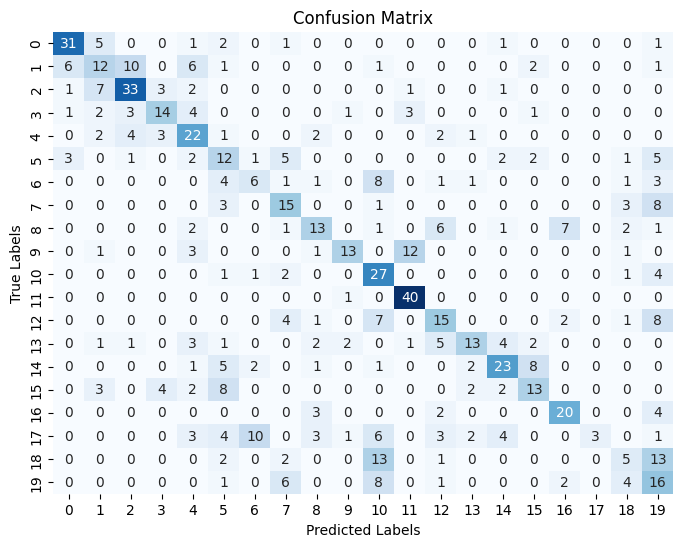


Recall: 0.48055555555555557
Precision: 0.5211737942895337
F1-Score: 0.4665133022872578
Exactitud: 0.48055555555555557


In [22]:
# Definición del modelo
Modelo = KNeighborsClassifier(n_neighbors=7)

# Entrenamiento del modelo
Modelo.fit(XC_train, yc_train)

# Test del modelo
yc_pred = Modelo.predict(XC_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(yc_test, yc_pred)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular recall, precision, f1-score y exactitud
reporte_clasificacion = classification_report(yc_test, yc_pred, zero_division=1, output_dict=True)

# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precision:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])
print('Exactitud:', Modelo.score(XC_test, yc_test))

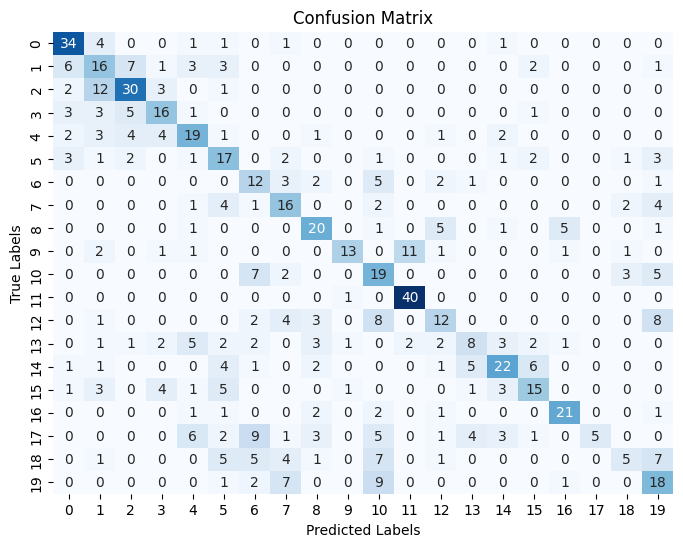


Recall: 0.49722222222222223
Precision: 0.5353088884530441
F1-Score: 0.48397451612344794
Exactitud: 0.49722222222222223


In [23]:
# Definición del modelo
Modelo = KNeighborsClassifier(n_neighbors=3)

# Entrenamiento del modelo
Modelo.fit(XC_train, yc_train)

# Test del modelo
yc_pred = Modelo.predict(XC_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(yc_test, yc_pred)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular recall, precision, f1-score y exactitud
reporte_clasificacion = classification_report(yc_test, yc_pred, zero_division=1, output_dict=True)

# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precision:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])
print('Exactitud:', Modelo.score(XC_test, yc_test))

CORTES

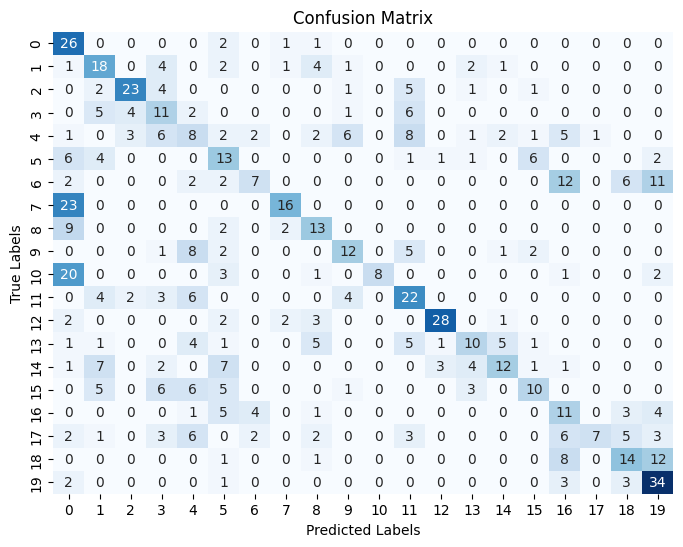


Recall: 0.42083333333333334
Precision: 0.5024058186308307
F1-Score: 0.41478537108579294
Exactitud: 0.42083333333333334


In [24]:
# Definición del modelo
Modelo = KNeighborsClassifier(n_neighbors=5)

# Entrenamiento del modelo
Modelo.fit(AC_train, bc_train)

# Test del modelo
bc_pred = Modelo.predict(AC_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(bc_test, bc_pred)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular recall, precision, f1-score y exactitud
reporte_clasificacion = classification_report(bc_test, bc_pred, zero_division=1, output_dict=True)

# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precision:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])
print('Exactitud:', Modelo.score(AC_test, bc_test))


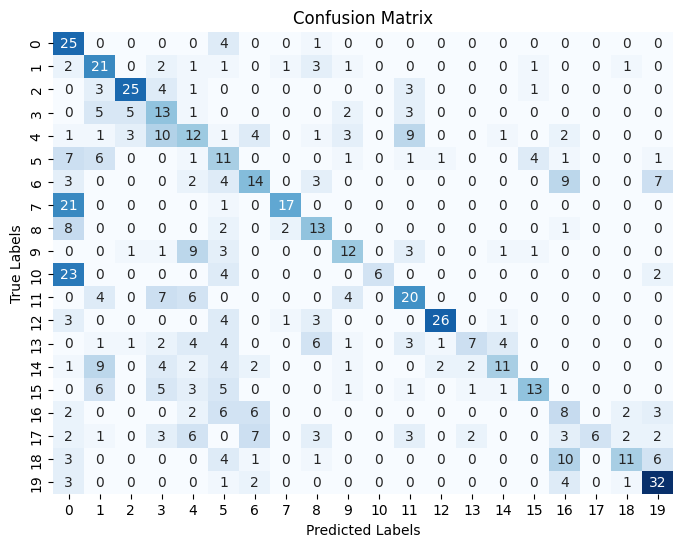


Recall: 0.42083333333333334
Precision: 0.5415633261879222
F1-Score: 0.422433908178659
Exactitud: 0.42083333333333334


In [25]:
# Definición del modelo
Modelo = KNeighborsClassifier(n_neighbors=3)

# Entrenamiento del modelo
Modelo.fit(AC_train, bc_train)

# Test del modelo
bc_pred = Modelo.predict(AC_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(bc_test, bc_pred)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular recall, precision, f1-score y exactitud
reporte_clasificacion = classification_report(bc_test, bc_pred, zero_division=1, output_dict=True)

# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precision:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])
print('Exactitud:', Modelo.score(AC_test, bc_test))


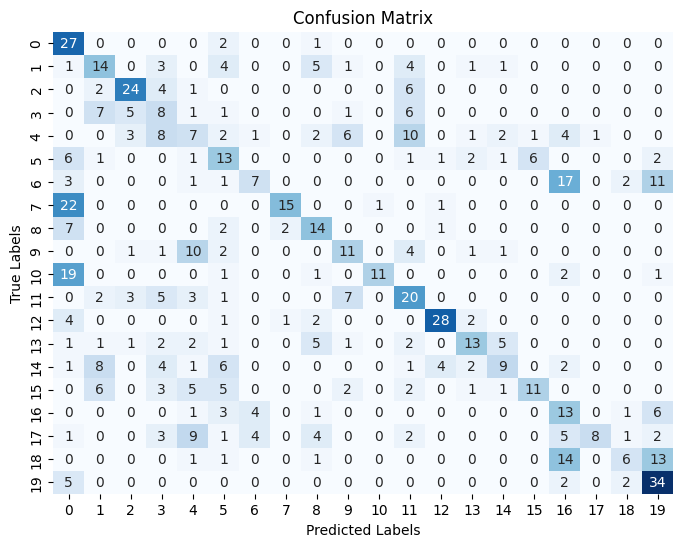


Recall: 0.40694444444444444
Precision: 0.4939641615117044
F1-Score: 0.4013239809863807
Exactitud: 0.40694444444444444


In [26]:
# Definición del modelo
Modelo = KNeighborsClassifier(n_neighbors=7)

# Entrenamiento del modelo
Modelo.fit(AC_train, bc_train)

# Test del modelo
bc_pred = Modelo.predict(AC_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(bc_test, bc_pred)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular recall, precision, f1-score y exactitud
reporte_clasificacion = classification_report(bc_test, bc_pred, zero_division=1, output_dict=True)

# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precision:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])
print('Exactitud:', Modelo.score(AC_test, bc_test))

# Escala de Grises

### **Naive Bayes**

TUBERCULOS

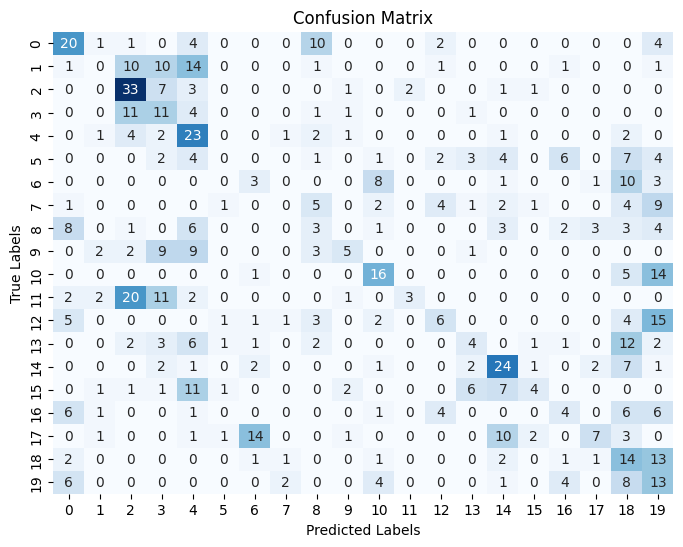


Recall: 0.26805555555555555
Precision: 0.2768404544377198
F1-Score: 0.2347396553528626
Exactitud: 0.26805555555555555


In [27]:
# Crear objeto NaiveBayes
NaiveBayes = GaussianNB()

# Entrenamiento
NaiveBayes.fit(X_train, y_train)

# Test del modelo
y_pred = NaiveBayes.predict(X_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular recall, precisión, f1-score y exactitud
reporte_clasificacion = classification_report(y_test, y_pred, output_dict=True)

# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precision:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])
print('Exactitud:', NaiveBayes.score(X_test, y_test))

CORTES


Recall: 0.20972222222222223
Precision: 0.20653743616110962
F1-Score: 0.17077236341378985
Exactitud: 0.20972222222222223


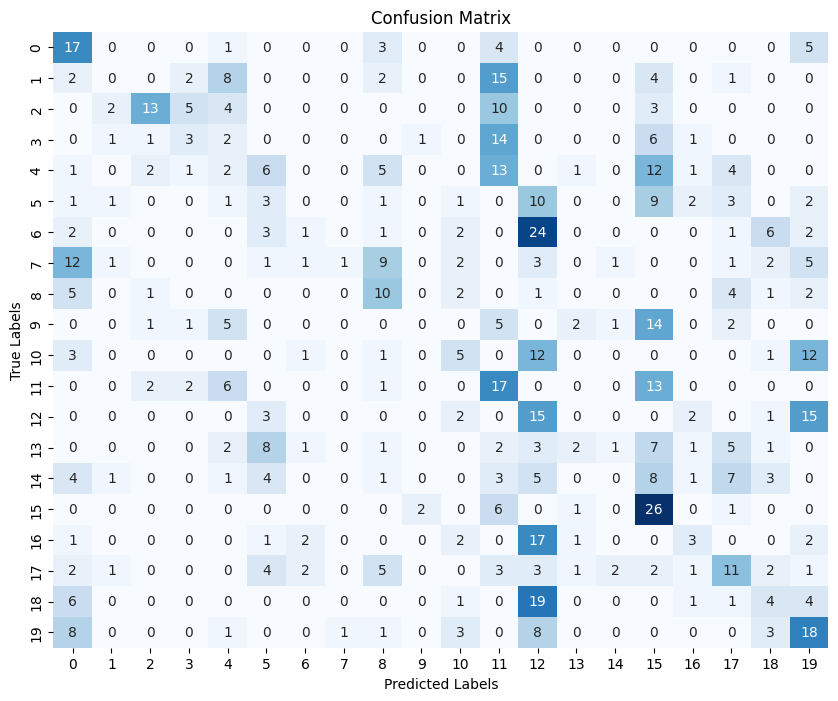

In [28]:
# Crear objeto NaiveBayes
NaiveBayes = GaussianNB()

# Entrenamiento
NaiveBayes.fit(A_train, b_train)

# Test del modelo
b_pred = NaiveBayes.predict(A_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(b_test, b_pred)

# Calcular recall, precisión, f1-score y exactitud
reporte_clasificacion = classification_report(b_test, b_pred, output_dict=True)

# Calcular la exactitud
exactitud = NaiveBayes.score(A_test, b_test)

print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precision:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])
print('Exactitud:', exactitud)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# RGB

### **Naive Bayes**

TUBERCULOS

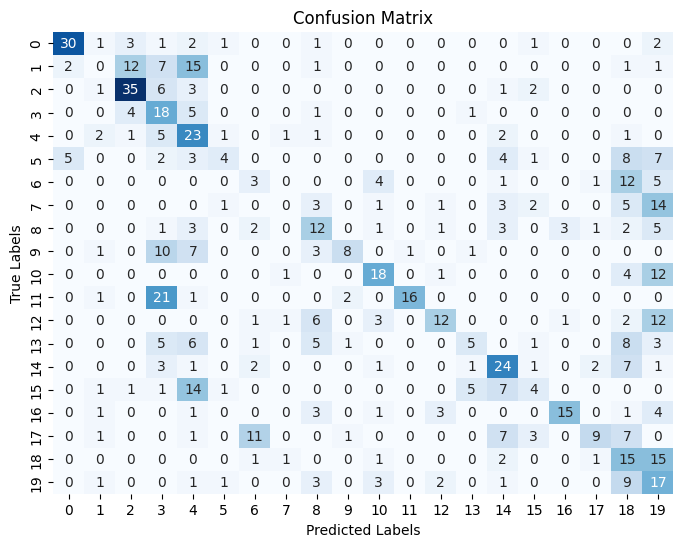


Recall: 0.37222222222222223
Precision: 0.4368481533499048
F1-Score: 0.3626690643155515
Exactitud: 0.37222222222222223


In [29]:
# Crear objeto NaiveBayes
NaiveBayes = GaussianNB()

# Entrenamiento del modelo
NaiveBayes.fit(XC_train, yc_train)

# Test del modelo
yc_pred = NaiveBayes.predict(XC_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(yc_test, yc_pred)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular recall, precisión, f1-score y exactitud
reporte_clasificacion = classification_report(yc_test, yc_pred, output_dict=True)

# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precision:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])
print('Exactitud:', NaiveBayes.score(XC_test, yc_test))

CORTES

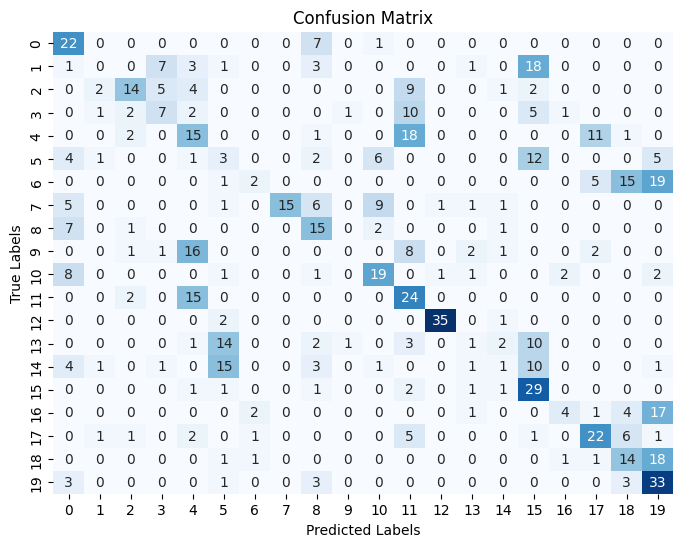


Recall: 0.3819444444444444
Precision: 0.37308093415892435
F1-Score: 0.3397696186340994
Exactitud: 0.3819444444444444


In [30]:
# Crear objeto NaiveBayes
NaiveBayes = GaussianNB()

# Entrenamiento del modelo
NaiveBayes.fit(AC_train, bc_train)

# Test del modelo
bc_pred = NaiveBayes.predict(AC_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(bc_test, bc_pred)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular recall, precisión, f1-score y exactitud
reporte_clasificacion = classification_report(bc_test, bc_pred, output_dict=True)

# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precision:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])
print('Exactitud:', NaiveBayes.score(AC_test, bc_test))

# Escala de grises

### **Árbol de Decisión**

TUBERCULOS

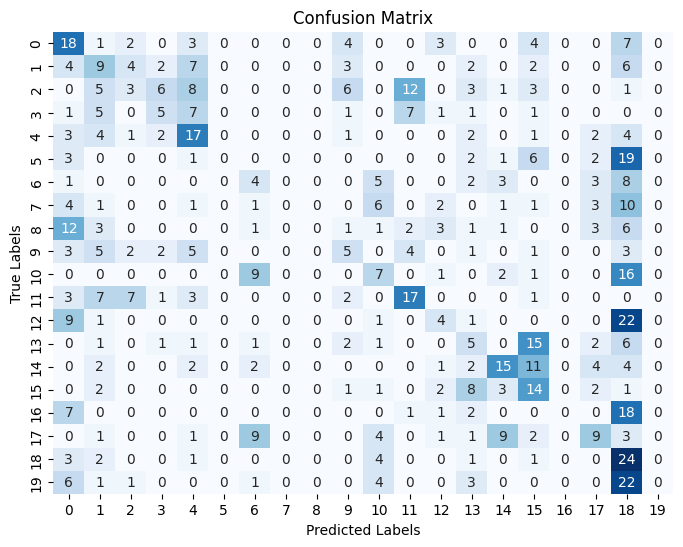


Recall: 0.21666666666666667
Precisión: 0.41095227234518444
F1-Score: 0.18314264877348674
Exactitud: 0.21666666666666667


In [31]:
# Definición del modelo
DecisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=5)

# Entrenamiento del modelo
DecisionTree.fit(X_train, y_train)

# Test del modelo
y_pred = DecisionTree.predict(X_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
# Calcular la exactitud
exactitud = accuracy_score(y_test, y_pred)
# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])
print('Exactitud:', exactitud)

CORTES

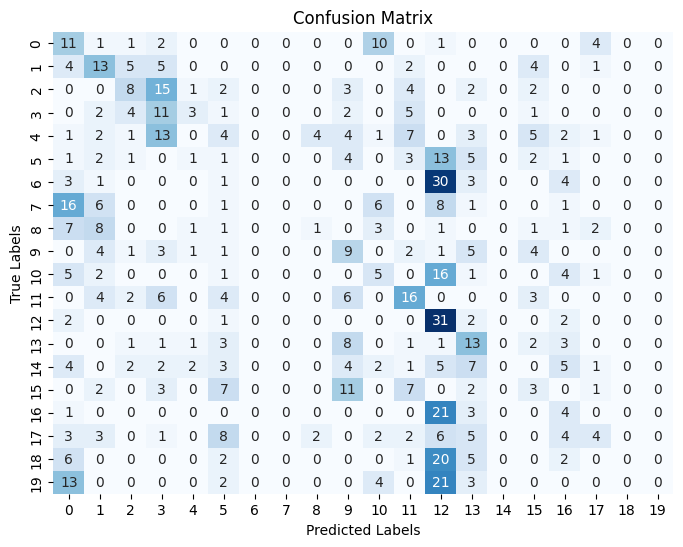


Recall: 0.18055555555555555
Precisión: 0.40010659917449115
F1-Score: 0.13225764727876946
Exactitud: 0.18055555555555555


In [32]:

# Definición del modelo
DecisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
# Entrenamiento del modelo
DecisionTree.fit(A_train, b_train)
# Test del modelo
b_pred = DecisionTree.predict(A_test)
# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(b_test, b_pred)
# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion = classification_report(b_test, b_pred, zero_division=1, output_dict=True)
# Calcular la exactitud
exactitud = accuracy_score(b_test, b_pred)
# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])
print('Exactitud:', exactitud)

# RGB

### **Árbol de Decisión**

TUBERCULOS

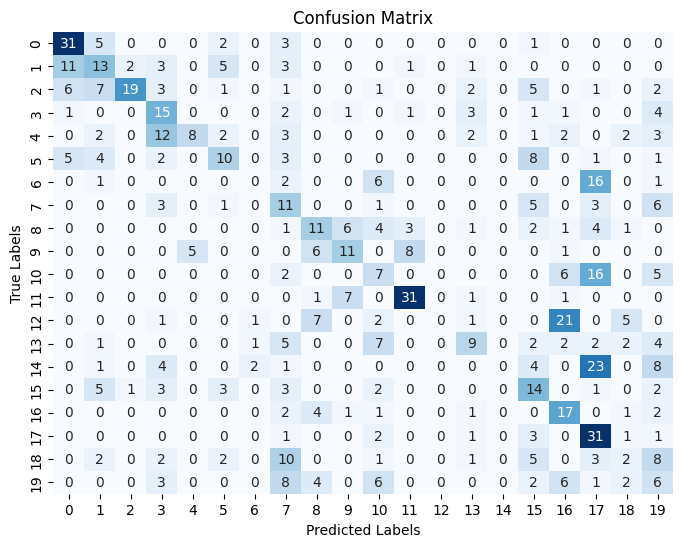


Recall: 0.3416666666666667
Precisión: 0.44512156565644967
F1-Score: 0.3127884939941796
Exactitud de DTC, max_depth=5: 0.3416666666666667


In [33]:
# Definición del modelo
DecisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=5)

# Entrenamiento del modelo
DecisionTree.fit(XC_train, yc_train)

# Test del modelo
y_pred = DecisionTree.predict(XC_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(yc_test, y_pred)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion = classification_report(yc_test, y_pred, zero_division=1, output_dict=True)

# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])

# Exactitud del modelo
Exactitud = DecisionTree.score(XC_test, yc_test)
print('Exactitud de DTC, max_depth=5:', Exactitud)


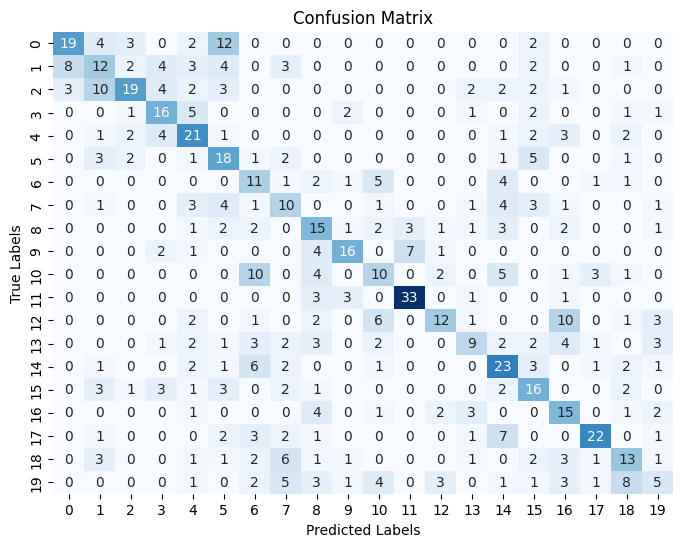


Recall: 0.4375
Precisión: 0.459309519342693
F1-Score: 0.4365218207371897
Exactitud de DTC, max_depth=5: 0.4375


In [34]:
# Definición del modelo
DecisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=8)

# Entrenamiento del modelo
DecisionTree.fit(XC_train, yc_train)

# Test del modelo
y_pred = DecisionTree.predict(XC_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(yc_test, y_pred)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion = classification_report(yc_test, y_pred, zero_division=1, output_dict=True)

# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])

# Exactitud del modelo
Exactitud = DecisionTree.score(XC_test, yc_test)
print('Exactitud de DTC, max_depth=5:', Exactitud)

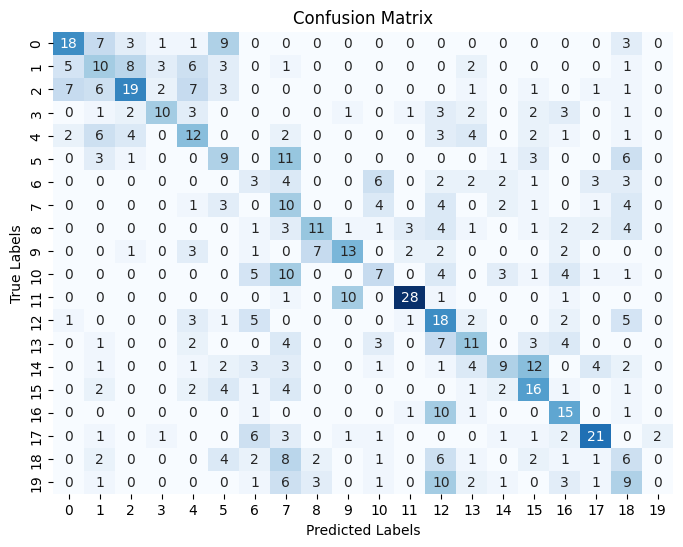


Recall: 0.3416666666666667
Precisión: 0.36497672847783824
F1-Score: 0.3425873626992898
Exactitud de DTC, max_depth=5: 0.3416666666666667


In [35]:
# Definición del modelo
DecisionTree = DecisionTreeClassifier(criterion='gini', max_depth=8)

# Entrenamiento del modelo
DecisionTree.fit(XC_train, yc_train)

# Test del modelo
y_pred = DecisionTree.predict(XC_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(yc_test, y_pred)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion = classification_report(yc_test, y_pred, zero_division=1, output_dict=True)

# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])

# Exactitud del modelo
Exactitud = DecisionTree.score(XC_test, yc_test)
print('Exactitud de DTC, max_depth=5:', Exactitud)

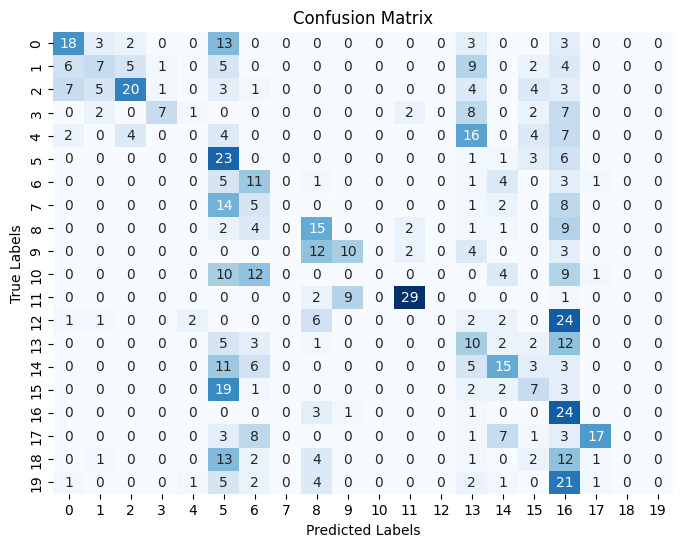


Recall: 0.29583333333333334
Precisión: 0.5607028134282555
F1-Score: 0.27089823673611096
Exactitud de DTC, max_depth=5: 0.29583333333333334


In [36]:
# Definición del modelo
DecisionTree = DecisionTreeClassifier(criterion='gini', max_depth=5)

# Entrenamiento del modelo
DecisionTree.fit(XC_train, yc_train)

# Test del modelo
y_pred = DecisionTree.predict(XC_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(yc_test, y_pred)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion = classification_report(yc_test, y_pred, zero_division=1, output_dict=True)

# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])

# Exactitud del modelo
Exactitud = DecisionTree.score(XC_test, yc_test)
print('Exactitud de DTC, max_depth=5:', Exactitud)

CORTES

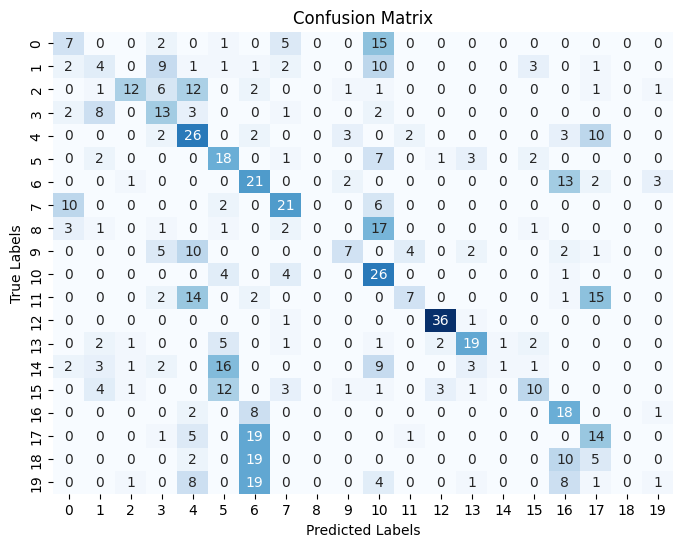


Recall: 0.3625
Precisión: 0.4583746972974909
F1-Score: 0.3252311398409729
Exactitud: 0.3625


In [37]:
# Definición del modelo
DecisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
# Entrenamiento del modelo
DecisionTree.fit(AC_train, bc_train)
# Test del modelo
b_pred = DecisionTree.predict(AC_test)
# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(bc_test, b_pred)
# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion = classification_report(bc_test, b_pred, zero_division=1, output_dict=True)
# Calcular la exactitud
exactitud = accuracy_score(b_test, b_pred)
# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])
print('Exactitud:', exactitud)


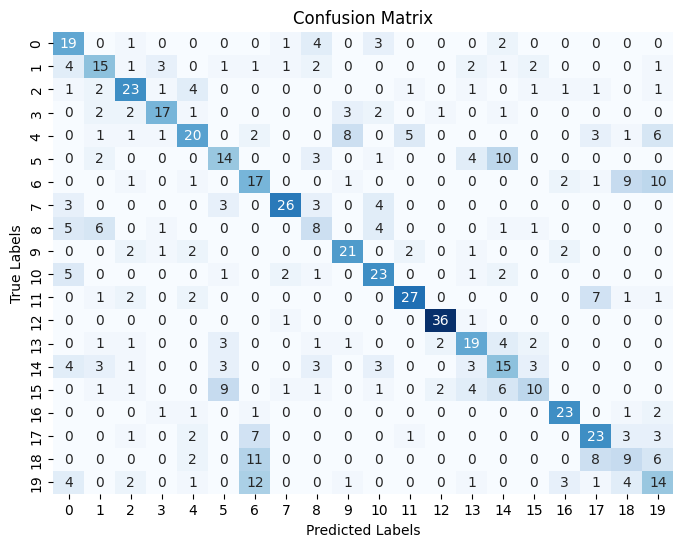


Recall: 0.5263888888888889
Precisión: 0.5327334295838646
F1-Score: 0.5243989822728906
Exactitud: 0.5263888888888889


In [38]:
# Definición del modelo
DecisionTree = DecisionTreeClassifier(criterion='entropy', max_depth=8)
# Entrenamiento del modelo
DecisionTree.fit(AC_train, bc_train)
# Test del modelo
b_pred = DecisionTree.predict(AC_test)
# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(bc_test, b_pred)
# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion = classification_report(bc_test, b_pred, zero_division=1, output_dict=True)
# Calcular la exactitud
exactitud = accuracy_score(b_test, b_pred)
# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])
print('Exactitud:', exactitud)

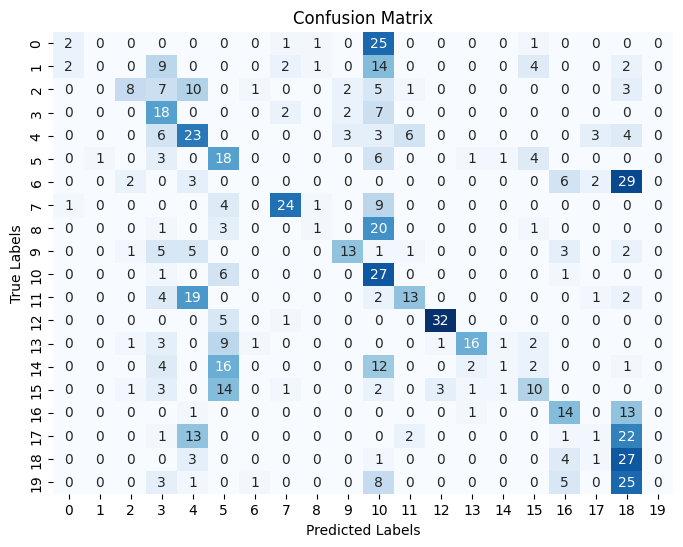


Recall: 0.34444444444444444
Precisión: 0.42087858020750424
F1-Score: 0.304335499000352
Exactitud: 0.34444444444444444


In [39]:
# Definición del modelo
DecisionTree = DecisionTreeClassifier(criterion='gini', max_depth=5)
# Entrenamiento del modelo
DecisionTree.fit(AC_train, bc_train)
# Test del modelo
b_pred = DecisionTree.predict(AC_test)
# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(bc_test, b_pred)
# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion = classification_report(bc_test, b_pred, zero_division=1, output_dict=True)
# Calcular la exactitud
exactitud = accuracy_score(b_test, b_pred)
# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])
print('Exactitud:', exactitud)

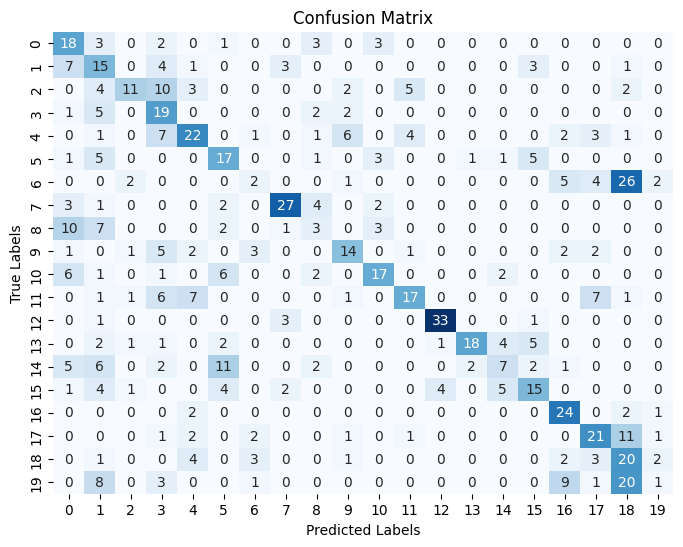


Recall: 0.44583333333333336
Precisión: 0.46509519464355226
F1-Score: 0.43193659783747224
Exactitud: 0.44583333333333336


In [40]:
# Definición del modelo
DecisionTree = DecisionTreeClassifier(criterion='gini', max_depth=8)
# Entrenamiento del modelo
DecisionTree.fit(AC_train, bc_train)
# Test del modelo
b_pred = DecisionTree.predict(AC_test)
# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(bc_test, b_pred)
# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion = classification_report(bc_test, b_pred, zero_division=1, output_dict=True)
# Calcular la exactitud
exactitud = accuracy_score(b_test, b_pred)
# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])
print('Exactitud:', exactitud)

# Escala de grises



### **Support Vector Classifier**

TUBERCULOS

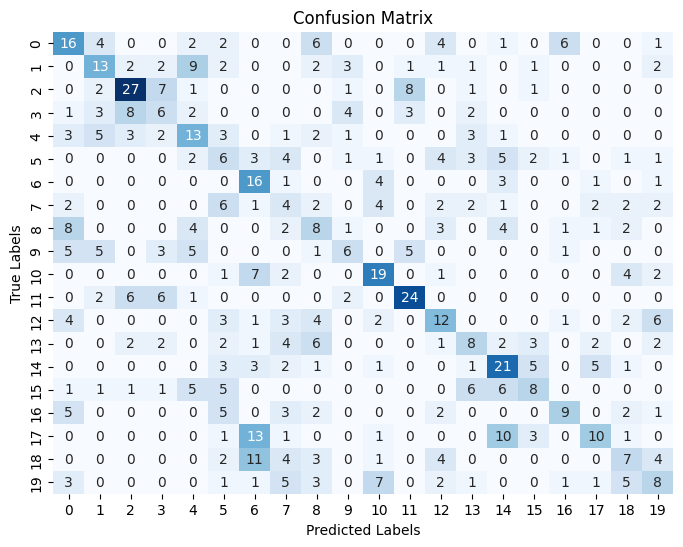


Recall: 0.3347222222222222
Precisión: 0.34299745589164793
F1-Score: 0.3318438253072694
Exactitud: 0.3347222222222222


In [41]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Definición del modelo
Modelo = SVC(kernel='linear', C=1)

# Entrenamiento del modelo
Modelo.fit(X_train, y_train)

# Test del modelo
y_pred = Modelo.predict(X_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion = classification_report(y_test, y_pred, output_dict=True)
# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])
# Calcular la exactitud
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud:', exactitud)

CORTES

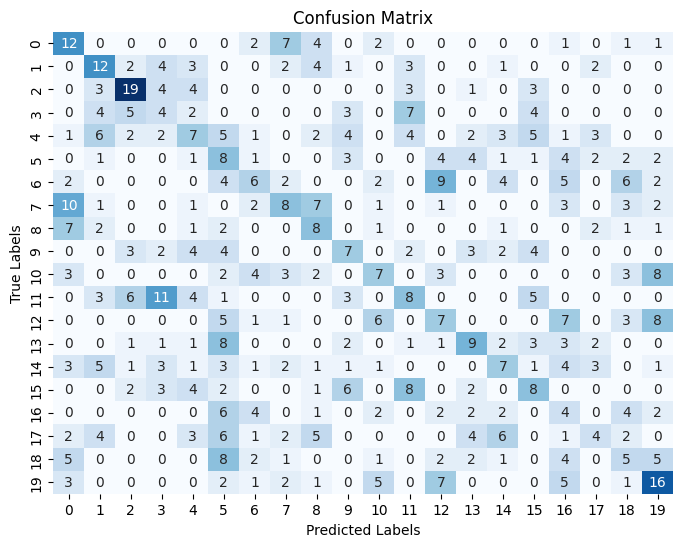


Recall: 0.23055555555555557
Precisión: 0.23541228830052555
F1-Score: 0.22787544295394055
Exactitud: 0.23055555555555557


In [42]:
# Definición del modelo
Modelo = SVC(kernel='linear', C=1)

# Entrenamiento del modelo
Modelo.fit(A_train, b_train)

# Test del modelo
y_pred = Modelo.predict(A_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(b_test, y_pred)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion = classification_report(b_test, y_pred, output_dict=True)

# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])

# Calcular la exactitud
exactitud = accuracy_score(b_test, y_pred)
print('Exactitud:', exactitud)


# RGB

### **Support Vector Classifier**

TUBERCULOS

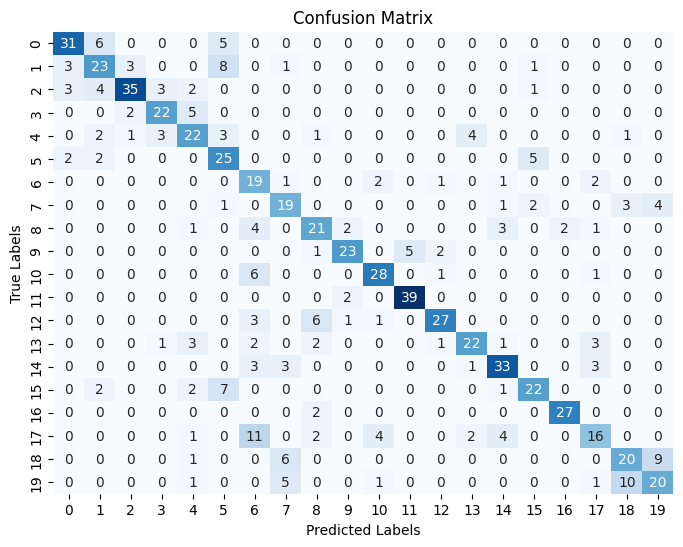


Recall: 0.6861111111111111
Precisión: 0.7011312861439104
F1-Score: 0.6882850755385744
Exactitud de SVM:  0.6861111111111111


In [43]:
# Definición del modelo
Modelo = SVC(kernel='linear', C=1)

# Entrenamiento del modelo
Modelo.fit(XC_train, yc_train)

# Test del modelo
y_pred = Modelo.predict(XC_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(yc_test, y_pred)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion = classification_report(yc_test, y_pred, zero_division=1, output_dict=True)
# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])
# Exactitud del modelo
Exactitud = Modelo.score(XC_test, yc_test)
print('Exactitud de SVM: ', Exactitud)

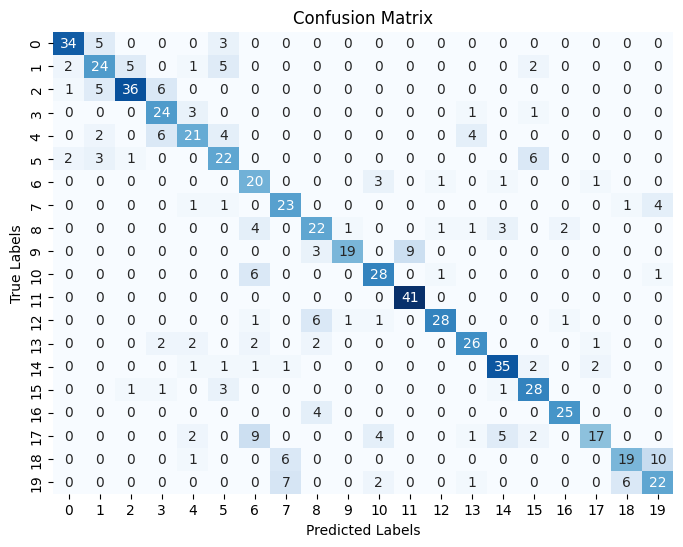


Recall: 0.7138888888888889
Precisión: 0.7308159509772253
F1-Score: 0.712784633618268
Exactitud de SVM:  0.7138888888888889


In [44]:
# Definición del modelo
Modelo = SVC(kernel='poly', degree=2, C=1)

# Entrenamiento del modelo
Modelo.fit(XC_train, yc_train)

# Test del modelo
y_pred = Modelo.predict(XC_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(yc_test, y_pred)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion = classification_report(yc_test, y_pred, zero_division=1, output_dict=True)
# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])
# Exactitud del modelo
Exactitud = Modelo.score(XC_test, yc_test)
print('Exactitud de SVM: ', Exactitud)

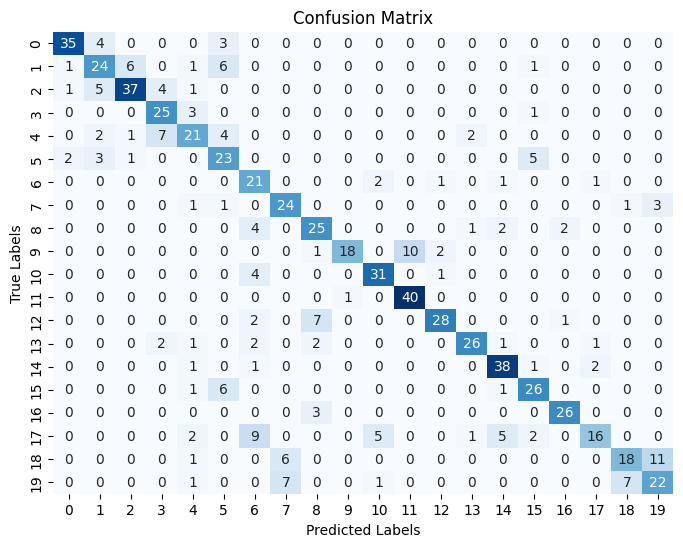


Recall: 0.7277777777777777
Precisión: 0.7438106995311511
F1-Score: 0.7251339058664442
Exactitud de SVM:  0.7277777777777777


In [45]:
# Definición del modelo
Modelo = SVC(kernel='poly', degree=2, C=2)

# Entrenamiento del modelo
Modelo.fit(XC_train, yc_train)

# Test del modelo
y_pred = Modelo.predict(XC_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(yc_test, y_pred)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion = classification_report(yc_test, y_pred, zero_division=1, output_dict=True)
# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])
# Exactitud del modelo
Exactitud = Modelo.score(XC_test, yc_test)
print('Exactitud de SVM: ', Exactitud)

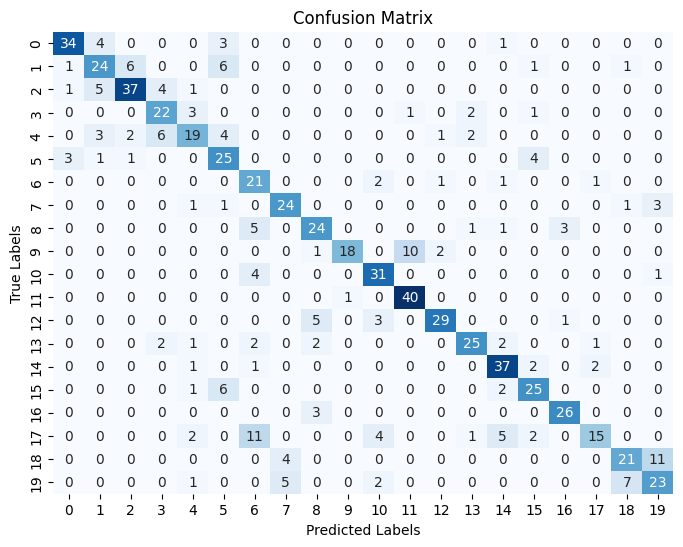


Recall: 0.7222222222222222
Precisión: 0.7368523681503758
F1-Score: 0.7190589117801052
Exactitud de SVM:  0.7222222222222222


In [46]:
# Definición del modelo
Modelo = SVC(kernel='poly', degree=3, C=2)

# Entrenamiento del modelo
Modelo.fit(XC_train, yc_train)

# Test del modelo
y_pred = Modelo.predict(XC_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(yc_test, y_pred)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion = classification_report(yc_test, y_pred, zero_division=1, output_dict=True)
# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])
# Exactitud del modelo
Exactitud = Modelo.score(XC_test, yc_test)
print('Exactitud de SVM: ', Exactitud)

CORTES

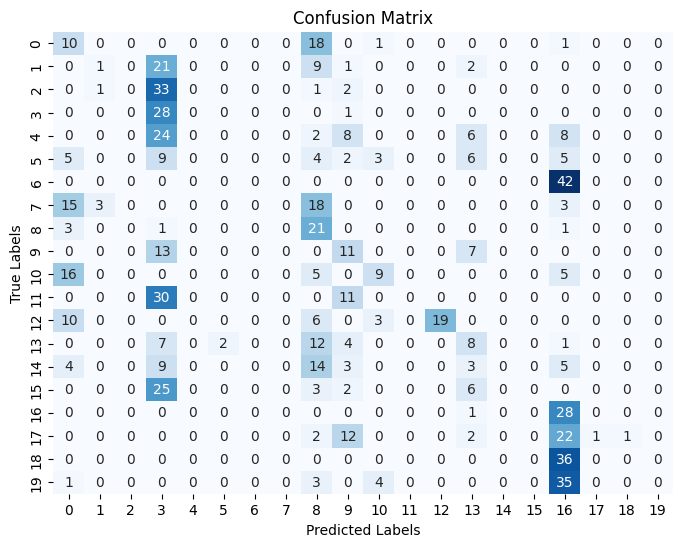


Recall: 0.18888888888888888
Precisión: 0.6316255386007622
F1-Score: 0.11651729552791096
Exactitud de SVM : 0.18888888888888888


In [47]:
# Definición del modelo
Modelo = SVC(kernel='linear', C=1)

# Entrenamiento del modelo
Modelo.fit(AC_train, bc_train)

# Test del modelo
y_pred = Modelo.predict(AC_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(bc_test, y_pred)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion = classification_report(bc_test, y_pred, zero_division=1, output_dict=True)
# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])
# Exactitud del modelo
Exactitud = Modelo.score(AC_test, bc_test)
print('Exactitud de SVM :', Exactitud)

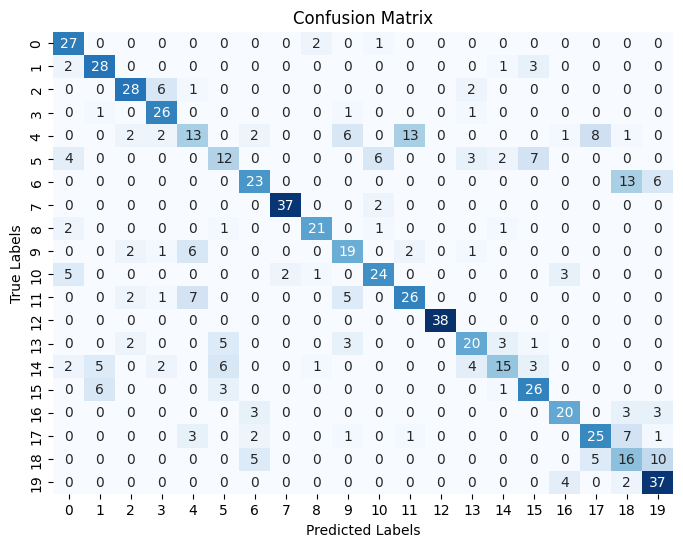


Recall: 0.6680555555555555
Precisión: 0.6635372899595223
F1-Score: 0.6593164569784628
Exactitud de SVM : 0.6680555555555555


In [48]:
# Definición del modelo
Modelo = SVC(kernel='poly', C=1,degree=2)

# Entrenamiento del modelo
Modelo.fit(AC_train, bc_train)

# Test del modelo
y_pred = Modelo.predict(AC_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(bc_test, y_pred)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion = classification_report(bc_test, y_pred, zero_division=1, output_dict=True)
# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])
# Exactitud del modelo
Exactitud = Modelo.score(AC_test, bc_test)
print('Exactitud de SVM :', Exactitud)

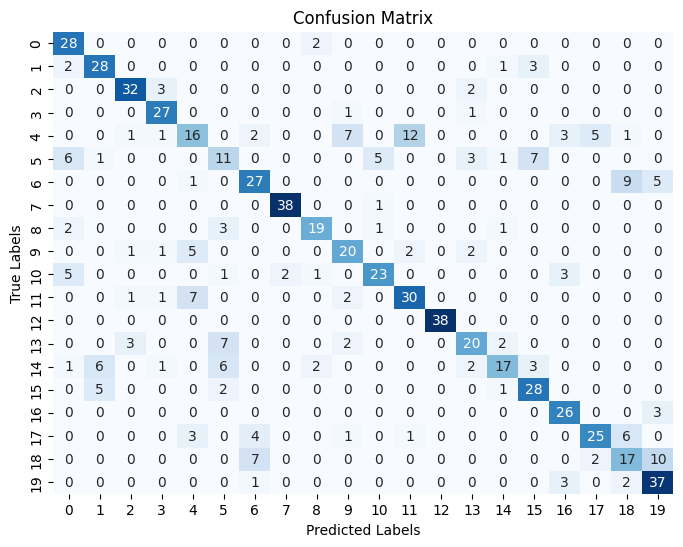


Recall: 0.7041666666666667
Precisión: 0.7004668483753845
F1-Score: 0.6955067045899865
Exactitud de SVM : 0.7041666666666667


In [49]:
# Definición del modelo
Modelo = SVC(kernel='poly', C=2,degree=2)

# Entrenamiento del modelo
Modelo.fit(AC_train, bc_train)

# Test del modelo
y_pred = Modelo.predict(AC_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(bc_test, y_pred)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion = classification_report(bc_test, y_pred, zero_division=1, output_dict=True)
# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])
# Exactitud del modelo
Exactitud = Modelo.score(AC_test, bc_test)
print('Exactitud de SVM :', Exactitud)

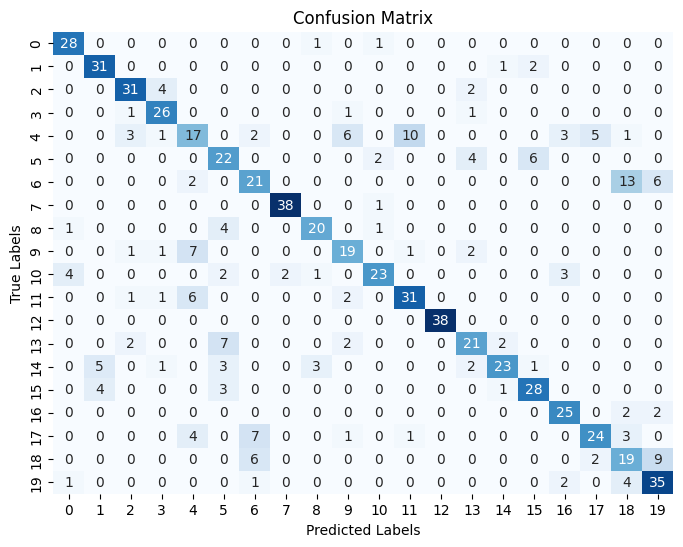


Recall: 0.7222222222222222
Precisión: 0.7231121254536971
F1-Score: 0.7181767965770972
Exactitud de SVM : 0.7222222222222222


In [50]:
# Definición del modelo
Modelo = SVC(kernel='poly', C=2,degree=3)

# Entrenamiento del modelo
Modelo.fit(AC_train, bc_train)

# Test del modelo
y_pred = Modelo.predict(AC_test)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(bc_test, y_pred)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion = classification_report(bc_test, y_pred, zero_division=1, output_dict=True)
# Mostrar los resultados
print('\nRecall:', reporte_clasificacion['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion['weighted avg']['f1-score'])
# Exactitud del modelo
Exactitud = Modelo.score(AC_test, bc_test)
print('Exactitud de SVM :', Exactitud)

# Escala de Grises

### **RandomForest**

TUBERCULOS

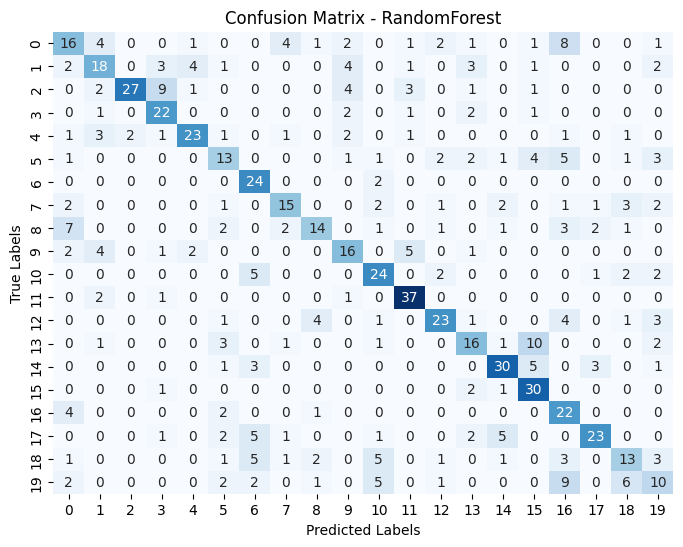


Recall: 0.5777777777777777
Precisión: 0.5927649966432313
F1-Score: 0.572115063793036
Exactitud del modelo RandomForest: 0.5777777777777777


In [51]:
# Crear una instancia del clasificador
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
modelo_rf.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_rf = modelo_rf.predict(X_test)

# Calcular la matriz de confusión
matriz_confusion_rf = confusion_matrix(y_test, y_pred_rf)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - RandomForest')
plt.show()

# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Mostrar los resultados
print('\nRecall:', reporte_clasificacion_rf['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion_rf['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion_rf['weighted avg']['f1-score'])

# Exactitud del modelo
exactitud_rf = modelo_rf.score(X_test, y_test)
print('Exactitud del modelo RandomForest:', exactitud_rf)


CORTES

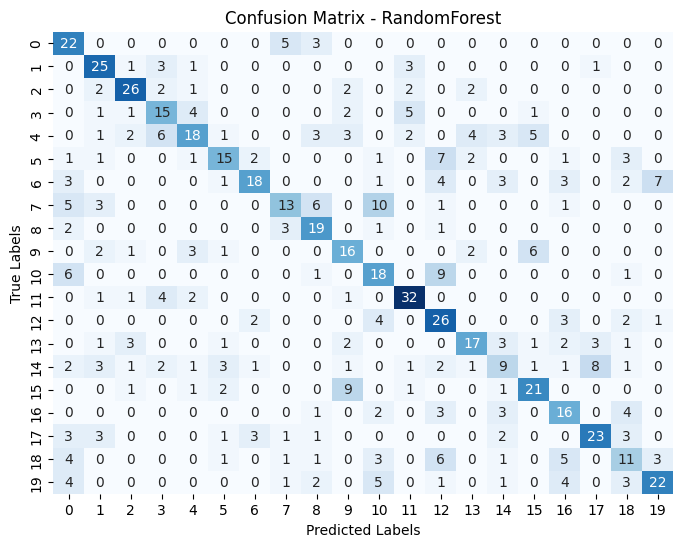


Recall: 0.5305555555555556
Precisión: 0.5430562623023213
F1-Score: 0.5251185135270688
Exactitud del modelo RandomForest: 0.5305555555555556


In [52]:
# Crear una instancia del clasificador
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
modelo_rf.fit(A_train, b_train)

# Predecir con el conjunto de prueba
y_pred_rf = modelo_rf.predict(A_test)

# Calcular la matriz de confusión
matriz_confusion_rf = confusion_matrix(b_test, y_pred_rf)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - RandomForest')
plt.show()

# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion_rf = classification_report(b_test, y_pred_rf, output_dict=True)

# Mostrar los resultados
print('\nRecall:', reporte_clasificacion_rf['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion_rf['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion_rf['weighted avg']['f1-score'])

# Exactitud del modelo
exactitud_rf = modelo_rf.score(A_test, b_test)
print('Exactitud del modelo RandomForest:', exactitud_rf)

# RGB

### **RandomForest**

TUBERCULOS

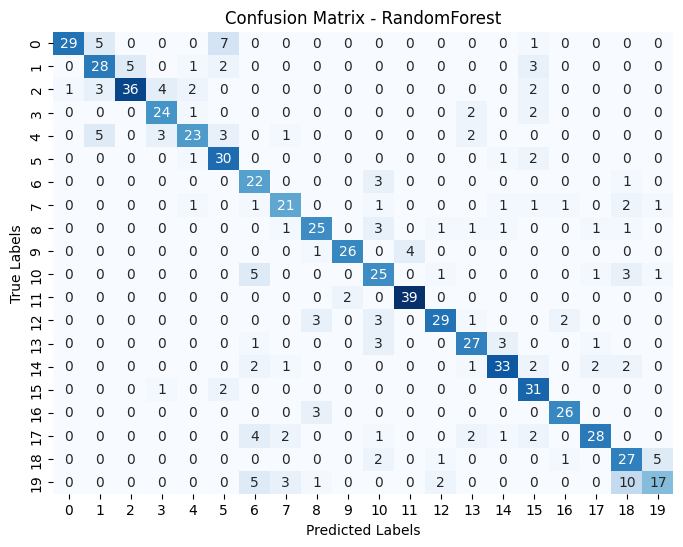


Recall: 0.7583333333333333
Precisión: 0.7743492562183284
F1-Score: 0.7585035522061762
Exactitud del modelo RandomForest: 0.7583333333333333


In [53]:
# Crear una instancia del clasificador
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
modelo_rf.fit(XC_train, yc_train)

# Predecir con el conjunto de prueba
y_pred_rf = modelo_rf.predict(XC_test)

# Calcular la matriz de confusión
matriz_confusion_rf = confusion_matrix(yc_test, y_pred_rf)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - RandomForest')
plt.show()

# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion_rf = classification_report(yc_test, y_pred_rf, zero_division=1, output_dict=True)

# Mostrar los resultados
print('\nRecall:', reporte_clasificacion_rf['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion_rf['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion_rf['weighted avg']['f1-score'])

# Exactitud del modelo
exactitud_rf = modelo_rf.score(XC_test, yc_test)
print('Exactitud del modelo RandomForest:', exactitud_rf)


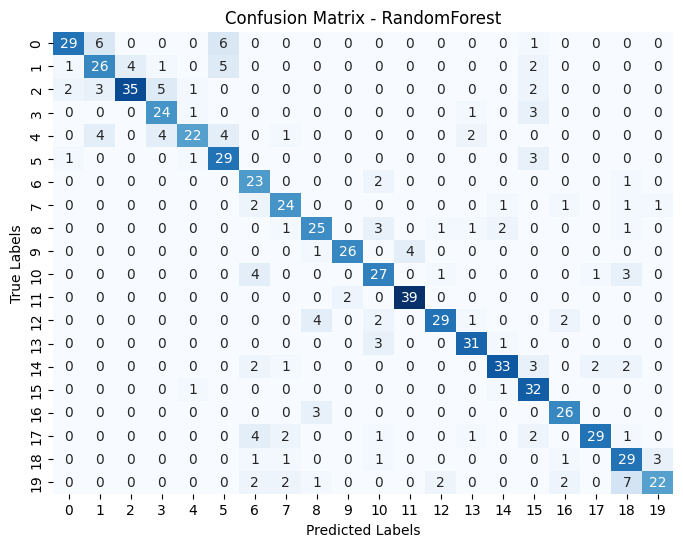


Recall: 0.7777777777777778
Precisión: 0.794720065369039
F1-Score: 0.7779820751158255
Exactitud del modelo RandomForest: 0.7777777777777778


In [54]:
# Crear una instancia del clasificador
modelo_rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Entrenar el modelo
modelo_rf.fit(XC_train, yc_train)

# Predecir con el conjunto de prueba
y_pred_rf = modelo_rf.predict(XC_test)

# Calcular la matriz de confusión
matriz_confusion_rf = confusion_matrix(yc_test, y_pred_rf)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - RandomForest')
plt.show()

# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion_rf = classification_report(yc_test, y_pred_rf, zero_division=1, output_dict=True)

# Mostrar los resultados
print('\nRecall:', reporte_clasificacion_rf['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion_rf['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion_rf['weighted avg']['f1-score'])

# Exactitud del modelo
exactitud_rf = modelo_rf.score(XC_test, yc_test)
print('Exactitud del modelo RandomForest:', exactitud_rf)


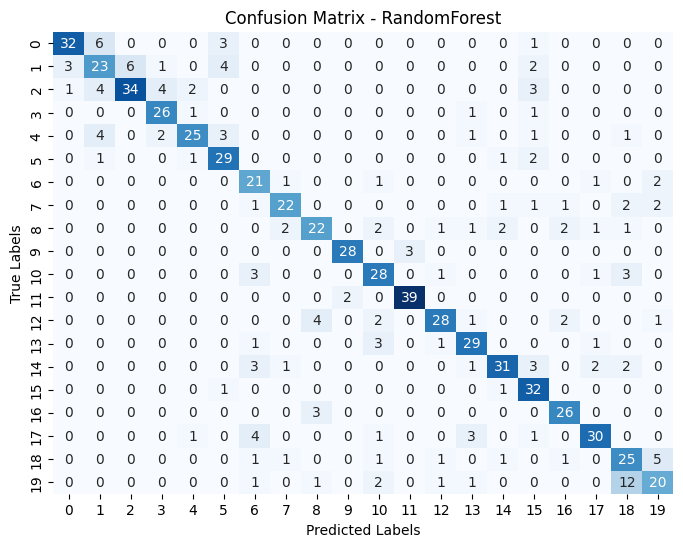


Recall: 0.7638888888888888
Precisión: 0.7738559057902925
F1-Score: 0.7638305172455182
Exactitud del modelo RandomForest: 0.7638888888888888


In [55]:
from sklearn.ensemble import RandomForestClassifier

# Crear una instancia del clasificador con diferentes hiperparámetros
modelo_rf = RandomForestClassifier(
    n_estimators=200,     # Cambiar el número de árboles en el bosque
    max_depth=15,         # Cambiar la profundidad máxima de cada árbol
    min_samples_split=5,  # Número mínimo de muestras requeridas para dividir un nodo interno
    min_samples_leaf=2,   # Número mínimo de muestras requeridas para estar en un nodo hoja
    criterion='gini',     # Cambiar el criterio de división ('gini' o 'entropy')
    random_state=42
)

# Entrenar el modelo
modelo_rf.fit(XC_train, yc_train)

# Predecir con el conjunto de prueba
y_pred_rf = modelo_rf.predict(XC_test)

# Resto del código permanece igual...

# Calcular la matriz de confusión
matriz_confusion_rf = confusion_matrix(yc_test, y_pred_rf)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - RandomForest')
plt.show()

# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion_rf = classification_report(yc_test, y_pred_rf, zero_division=1, output_dict=True)

# Mostrar los resultados
print('\nRecall:', reporte_clasificacion_rf['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion_rf['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion_rf['weighted avg']['f1-score'])

# Exactitud del modelo
exactitud_rf = modelo_rf.score(XC_test, yc_test)
print('Exactitud del modelo RandomForest:', exactitud_rf)



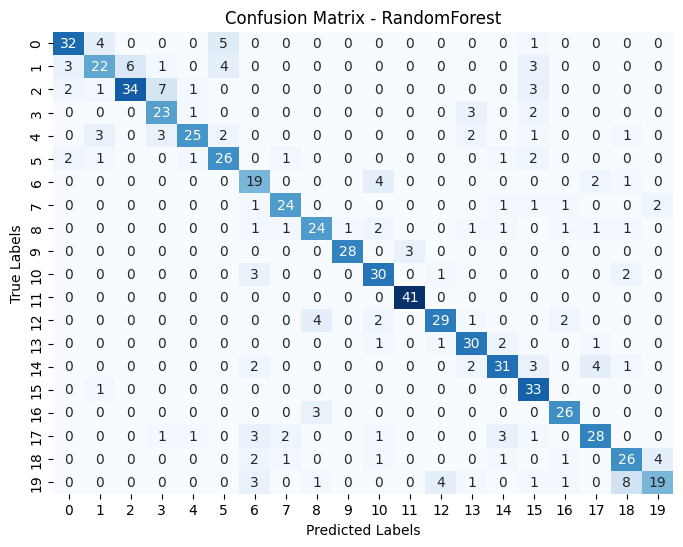


Recall: 0.7638888888888888
Precisión: 0.7725944328542738
F1-Score: 0.7622485885581736
Exactitud del modelo RandomForest: 0.7638888888888888


In [56]:
from sklearn.ensemble import RandomForestClassifier

# Crear una instancia del clasificador con diferentes hiperparámetros
modelo_rf = RandomForestClassifier(
    n_estimators=200,     # Cambiar el número de árboles en el bosque
    max_depth=15,         # Cambiar la profundidad máxima de cada árbol
    min_samples_split=5,  # Número mínimo de muestras requeridas para dividir un nodo interno
    min_samples_leaf=2,   # Número mínimo de muestras requeridas para estar en un nodo hoja
    criterion='entropy',     # Cambiar el criterio de división ('gini' o 'entropy')
    random_state=42
)

# Entrenar el modelo
modelo_rf.fit(XC_train, yc_train)

# Predecir con el conjunto de prueba
y_pred_rf = modelo_rf.predict(XC_test)

# Resto del código permanece igual...

# Calcular la matriz de confusión
matriz_confusion_rf = confusion_matrix(yc_test, y_pred_rf)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - RandomForest')
plt.show()

# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion_rf = classification_report(yc_test, y_pred_rf, zero_division=1, output_dict=True)

# Mostrar los resultados
print('\nRecall:', reporte_clasificacion_rf['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion_rf['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion_rf['weighted avg']['f1-score'])

# Exactitud del modelo
exactitud_rf = modelo_rf.score(XC_test, yc_test)
print('Exactitud del modelo RandomForest:', exactitud_rf)



CORTES

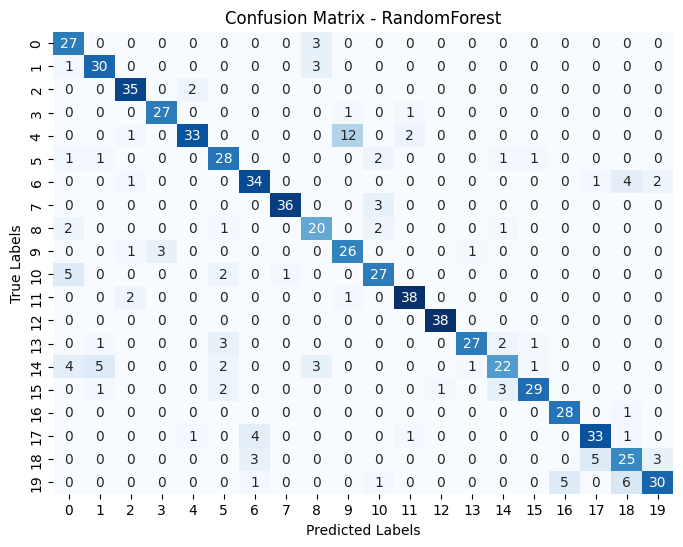


Recall: 0.8236111111111111
Precisión: 0.8312625508973058
F1-Score: 0.823017631419537
Exactitud del modelo RandomForest: 0.8236111111111111


In [57]:
# Crear una instancia del clasificador
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
modelo_rf.fit(AC_train, bc_train)

# Predecir con el conjunto de prueba
y_pred_rf = modelo_rf.predict(AC_test)

# Calcular la matriz de confusión
matriz_confusion_rf = confusion_matrix(bc_test, y_pred_rf)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - RandomForest')
plt.show()

# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion_rf = classification_report(bc_test, y_pred_rf, zero_division=1, output_dict=True)

# Mostrar los resultados
print('\nRecall:', reporte_clasificacion_rf['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion_rf['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion_rf['weighted avg']['f1-score'])
# Exactitud del modelo
exactitud_rf = modelo_rf.score(AC_test, bc_test)
print('Exactitud del modelo RandomForest:', exactitud_rf)

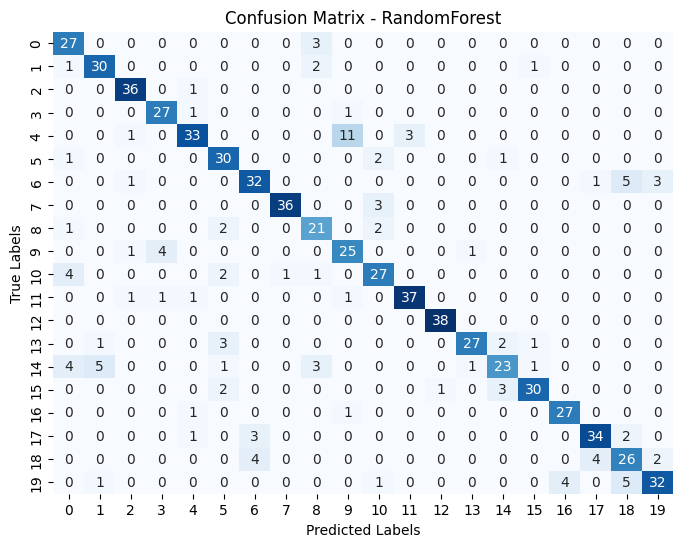


Recall: 0.8305555555555556
Precisión: 0.8371350577396083
F1-Score: 0.8301852264218426
Exactitud del modelo RandomForest: 0.8305555555555556


In [58]:
# Crear una instancia del clasificador
modelo_rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Entrenar el modelo
modelo_rf.fit(AC_train, bc_train)

# Predecir con el conjunto de prueba
y_pred_rf = modelo_rf.predict(AC_test)

# Calcular la matriz de confusión
matriz_confusion_rf = confusion_matrix(bc_test, y_pred_rf)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - RandomForest')
plt.show()

# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion_rf = classification_report(bc_test, y_pred_rf, zero_division=1, output_dict=True)

# Mostrar los resultados
print('\nRecall:', reporte_clasificacion_rf['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion_rf['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion_rf['weighted avg']['f1-score'])
# Exactitud del modelo
exactitud_rf = modelo_rf.score(AC_test, bc_test)
print('Exactitud del modelo RandomForest:', exactitud_rf)

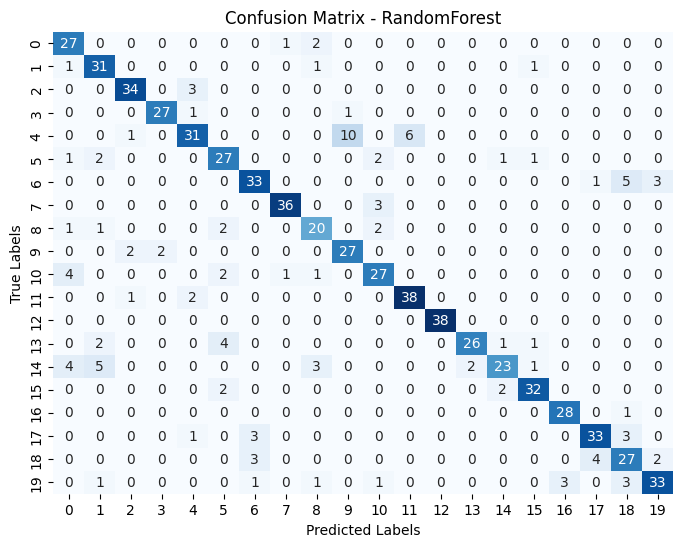


Recall: 0.8305555555555556
Precisión: 0.8364257938693187
F1-Score: 0.8295840297509547
Exactitud del modelo RandomForest: 0.8305555555555556


In [59]:
# Crear una instancia del clasificador
modelo_rf = RandomForestClassifier(
    n_estimators=200,     # Cambiar el número de árboles en el bosque
    max_depth=15,         # Cambiar la profundidad máxima de cada árbol
    min_samples_split=5,  # Número mínimo de muestras requeridas para dividir un nodo interno
    min_samples_leaf=2,   # Número mínimo de muestras requeridas para estar en un nodo hoja
    criterion='entropy',     # Cambiar el criterio de división ('gini' o 'entropy')
    random_state=42
)


# Entrenar el modelo
modelo_rf.fit(AC_train, bc_train)

# Predecir con el conjunto de prueba
y_pred_rf = modelo_rf.predict(AC_test)

# Calcular la matriz de confusión
matriz_confusion_rf = confusion_matrix(bc_test, y_pred_rf)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - RandomForest')
plt.show()

# Calcular recall, f1-score, precisión y exactitud
reporte_clasificacion_rf = classification_report(bc_test, y_pred_rf, zero_division=1, output_dict=True)

# Mostrar los resultados
print('\nRecall:', reporte_clasificacion_rf['weighted avg']['recall'])
print('Precisión:', reporte_clasificacion_rf['weighted avg']['precision'])
print('F1-Score:', reporte_clasificacion_rf['weighted avg']['f1-score'])
# Exactitud del modelo
exactitud_rf = modelo_rf.score(AC_test, bc_test)
print('Exactitud del modelo RandomForest:', exactitud_rf)

# Escala de Grises

### **CNN**

Forma de las imágenes: (3600, 100, 100, 1)
Forma de las etiquetas (one-hot): (3600, 20)
Epoch 1/40


I0000 00:00:1707006350.010266      80 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


90/90 [==============================] - 8s 18ms/step - loss: 2.9997 - accuracy: 0.0476 - val_loss: 2.9825 - val_accuracy: 0.0458
Epoch 2/40
90/90 [==============================] - 1s 13ms/step - loss: 2.8760 - accuracy: 0.0882 - val_loss: 2.6207 - val_accuracy: 0.0903
Epoch 3/40
90/90 [==============================] - 1s 13ms/step - loss: 2.6699 - accuracy: 0.1243 - val_loss: 2.5269 - val_accuracy: 0.1153
Epoch 4/40
90/90 [==============================] - 1s 13ms/step - loss: 2.5152 - accuracy: 0.1587 - val_loss: 2.3107 - val_accuracy: 0.1792
Epoch 5/40
90/90 [==============================] - 1s 13ms/step - loss: 2.3682 - accuracy: 0.1851 - val_loss: 2.1270 - val_accuracy: 0.2500
Epoch 6/40
90/90 [==============================] - 1s 14ms/step - loss: 2.2523 - accuracy: 0.2170 - val_loss: 2.0836 - val_accuracy: 0.2750
Epoch 7/40
90/90 [==============================] - 1s 14ms/step - loss: 2.1541 - accuracy: 0.2389 - val_loss: 1.9398 - val_accuracy: 0.3181
Epoch 8/40
90/90 [======

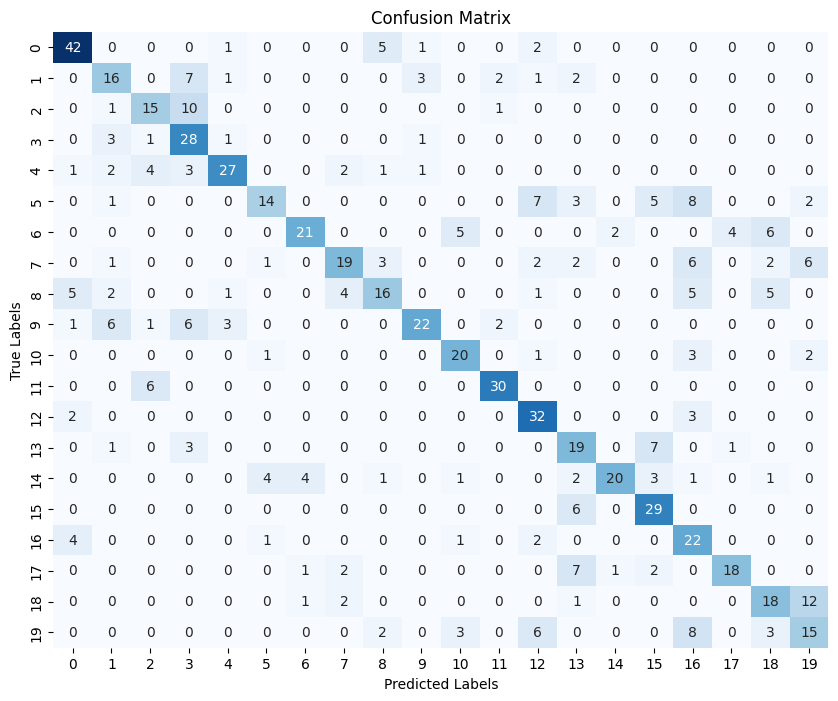

Recall: 0.6152777777777778
Precision: 0.645192992299753
F1-Score: 0.6135959487271601
Accuracy: 0.6152777777777778


In [60]:
# Cargar datos
with open('/kaggle/input/datatuberculoscortes/images_tuberculos_gray.dat', 'rb') as f:
    images_data = pickle.load(f)

with open('/kaggle/input/datatuberculoscortes/labels_tuberculos.dat', 'rb') as f:
    labels = pickle.load(f)

# Convertir a formato numpy
X = np.array(images_data)
y = np.array(labels)

# Convertir las etiquetas a formato one-hot
y_one_hot = to_categorical(y)

# Normalizar los datos
X = X / 255.0

# Expande las dimensiones de X para que tenga rango 4
X = np.expand_dims(X, axis=-1)

# Verificar formas de las imágenes y las etiquetas
print("Forma de las imágenes:", X.shape)
print("Forma de las etiquetas (one-hot):", y_one_hot.shape)

# Crear modelo
cnn = Sequential()
cnn.add(Convolution2D(32, (3,3), padding='same', input_shape=(100, 100, 1), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Convolution2D(64, (2,2), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Convolution2D(128, (3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(20, activation='softmax'))

# Compilar modelo
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Dividir datos en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Entrenar modelo sin aumento de datos
history = cnn.fit(X_train, y_train, batch_size=32, epochs=40, validation_data=(X_val, y_val))

# Calcular predicciones en el conjunto de validación
y_pred = cnn.predict(X_val)

# Convertir las predicciones a clases
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

# Calcular y mostrar métricas
precision = precision_score(y_val_classes, y_pred_classes, average='weighted')
recall = recall_score(y_val_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_val_classes, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_val_classes, y_pred_classes)

# Visualizar la matriz de confusión con Seaborn
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1)
print("Accuracy:", accuracy)

CORTES


Forma de las imágenes: (3600, 100, 100, 1)
Forma de las etiquetas (one-hot): (3600, 20)
Epoch 1/40
90/90 [==============================] - 3s 17ms/step - loss: 2.9854 - accuracy: 0.0531 - val_loss: 2.8805 - val_accuracy: 0.0958
Epoch 2/40
90/90 [==============================] - 1s 13ms/step - loss: 2.7620 - accuracy: 0.0931 - val_loss: 2.6082 - val_accuracy: 0.0833
Epoch 3/40
90/90 [==============================] - 1s 13ms/step - loss: 2.5979 - accuracy: 0.1170 - val_loss: 2.4604 - val_accuracy: 0.1264
Epoch 4/40
90/90 [==============================] - 1s 13ms/step - loss: 2.5059 - accuracy: 0.1431 - val_loss: 2.2854 - val_accuracy: 0.2208
Epoch 5/40
90/90 [==============================] - 1s 13ms/step - loss: 2.3445 - accuracy: 0.1799 - val_loss: 1.9785 - val_accuracy: 0.3167
Epoch 6/40
90/90 [==============================] - 1s 13ms/step - loss: 2.1692 - accuracy: 0.2389 - val_loss: 1.8164 - val_accuracy: 0.3361
Epoch 7/40
90/90 [==============================] - 1s 13ms/step -

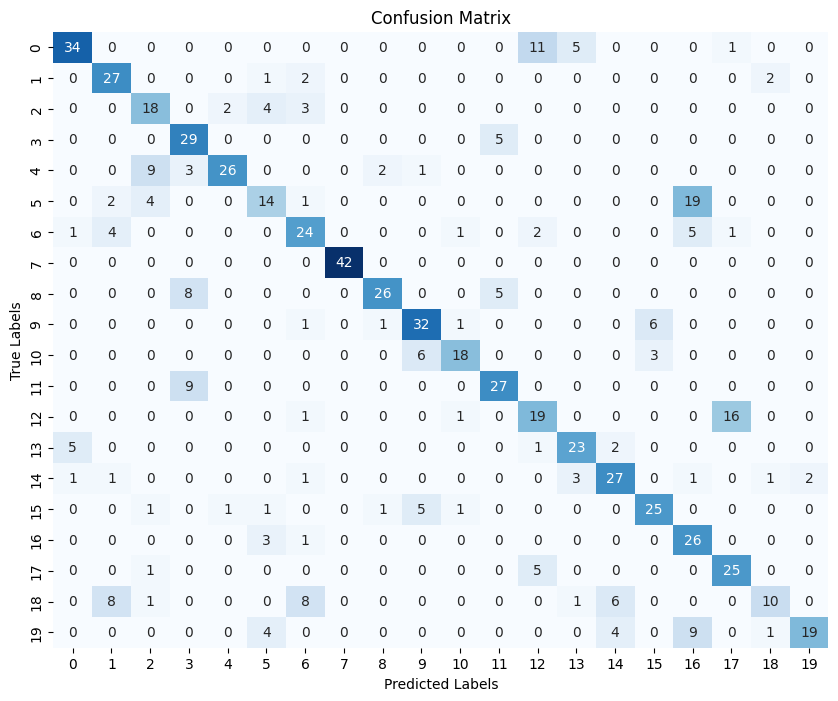

Recall: 0.6819444444444445
Precision: 0.7102649663303351
F1-Score: 0.6793937444623735
Accuracy: 0.6819444444444445


In [61]:
# Cargar datos
with open('/kaggle/input/datatuberculoscortes/images_cortes_gray.dat', 'rb') as f:
    
    images_data = pickle.load(f)

with open('/kaggle/input/datatuberculoscortes/labels_tuberculos.dat', 'rb') as f:
    labels = pickle.load(f)

# Convertir a formato numpy
X = np.array(images_data)
y = np.array(labels)

# Convertir las etiquetas a formato one-hot
y_one_hot = to_categorical(y)

# Normalizar los datos
X = X / 255.0

# Expande las dimensiones de X para que tenga rango 4
X = np.expand_dims(X, axis=-1)

# Verificar formas de las imágenes y las etiquetas
print("Forma de las imágenes:", X.shape)
print("Forma de las etiquetas (one-hot):", y_one_hot.shape)

# Crear modelo
cnn = Sequential()
cnn.add(Convolution2D(32, (3,3), padding='same', input_shape=(100, 100, 1), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Convolution2D(64, (2,2), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Convolution2D(128, (3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(20, activation='softmax'))

# Compilar modelo
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Dividir datos en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Entrenar modelo sin aumento de datos
history = cnn.fit(X_train, y_train, batch_size=32, epochs=40, validation_data=(X_val, y_val))

# Calcular predicciones en el conjunto de validación
y_pred = cnn.predict(X_val)

# Convertir las predicciones a clases
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

# Calcular y mostrar métricas
precision = precision_score(y_val_classes, y_pred_classes, average='weighted')
recall = recall_score(y_val_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_val_classes, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_val_classes, y_pred_classes)

# Visualizar la matriz de confusión con Seaborn
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1)
print("Accuracy:", accuracy)

# RGB

CNN

TUBERCULOS

Forma de las imágenes: (3600, 100, 100, 3)
Forma de las etiquetas (one-hot): (3600, 20)
Epoch 1/40
90/90 [==============================] - 9s 80ms/step - loss: 2.9622 - accuracy: 0.0674 - val_loss: 2.6807 - val_accuracy: 0.1236
Epoch 2/40
90/90 [==============================] - 7s 77ms/step - loss: 2.6727 - accuracy: 0.1142 - val_loss: 2.3806 - val_accuracy: 0.1514
Epoch 3/40
90/90 [==============================] - 7s 78ms/step - loss: 2.4655 - accuracy: 0.1500 - val_loss: 2.1381 - val_accuracy: 0.2653
Epoch 4/40
90/90 [==============================] - 7s 81ms/step - loss: 2.2564 - accuracy: 0.2094 - val_loss: 1.8150 - val_accuracy: 0.4139
Epoch 5/40
90/90 [==============================] - 7s 78ms/step - loss: 2.0419 - accuracy: 0.2688 - val_loss: 1.7422 - val_accuracy: 0.3806
Epoch 6/40
90/90 [==============================] - 7s 78ms/step - loss: 1.8652 - accuracy: 0.3087 - val_loss: 1.3356 - val_accuracy: 0.5014
Epoch 7/40
90/90 [==============================] - 7s 80ms/step -

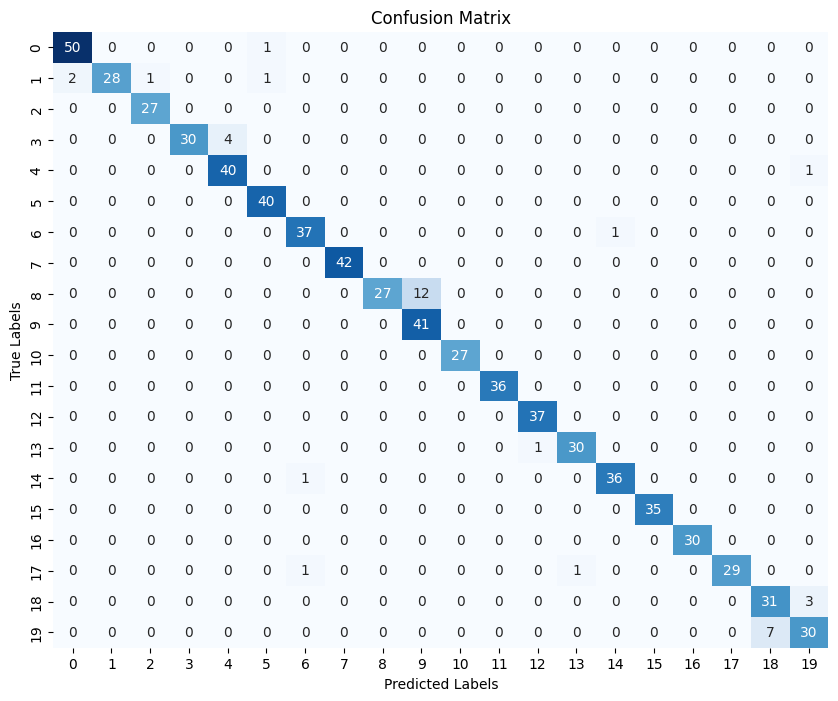

Recall: 0.9486111111111111
Precision: 0.953639751519118
F1-Score: 0.948043322001205
Accuracy: 0.9486111111111111


In [62]:
# Cargar datos
with open('/kaggle/input/datatuberculoscortes/images_tuberculos_color.dat', 'rb') as f:
    images_data = pickle.load(f)

with open('/kaggle/input/datatuberculoscortes/labels_tuberculos.dat', 'rb') as f:
    labels = pickle.load(f)

# Convertir a formato numpy
X = np.array(images_data)
y = np.array(labels)

# Convertir las etiquetas a formato one-hot
y_one_hot = to_categorical(y)

# Normalizar los datos
X = X / 255.0

# Verificar formas de las imágenes y las etiquetas
print("Forma de las imágenes:", X.shape)
print("Forma de las etiquetas (one-hot):", y_one_hot.shape)

# Aumento de datos
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X)

# Crear modelo
cnn = Sequential()
cnn.add(Convolution2D(32, (3,3), padding='same', input_shape=(100, 100, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Convolution2D(64, (2,2), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Convolution2D(128, (3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(20, activation='softmax'))

# Compilar modelo
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Dividir datos en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Entrenar modelo con aumento de datos
history = cnn.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=40, validation_data=(X_val, y_val))

# Calcular predicciones en el conjunto de validación
y_pred = cnn.predict(X_val)

# Convertir las predicciones a clases
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

# Calcular y mostrar métricas
precision = precision_score(y_val_classes, y_pred_classes, average='weighted')
recall = recall_score(y_val_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_val_classes, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_val_classes, y_pred_classes)

# Visualizar la matriz de confusión con Seaborn
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1)
print("Accuracy:", accuracy)

Epoch 1/50
90/90 [==============================] - 10s 84ms/step - loss: 2.9688 - accuracy: 0.0674 - val_loss: 2.6634 - val_accuracy: 0.1278
Epoch 2/50
90/90 [==============================] - 7s 79ms/step - loss: 2.6417 - accuracy: 0.1215 - val_loss: 2.4098 - val_accuracy: 0.1389
Epoch 3/50
90/90 [==============================] - 7s 78ms/step - loss: 2.5020 - accuracy: 0.1406 - val_loss: 2.2511 - val_accuracy: 0.2236
Epoch 4/50
90/90 [==============================] - 7s 78ms/step - loss: 2.3092 - accuracy: 0.1875 - val_loss: 1.9509 - val_accuracy: 0.2639
Epoch 5/50
90/90 [==============================] - 7s 78ms/step - loss: 2.1662 - accuracy: 0.2108 - val_loss: 1.9726 - val_accuracy: 0.2194
Epoch 6/50
90/90 [==============================] - 7s 79ms/step - loss: 2.0377 - accuracy: 0.2392 - val_loss: 1.7028 - val_accuracy: 0.3583
Epoch 7/50
90/90 [==============================] - 7s 79ms/step - loss: 1.9029 - accuracy: 0.2858 - val_loss: 1.5315 - val_accuracy: 0.4903
Epoch 8/50
9

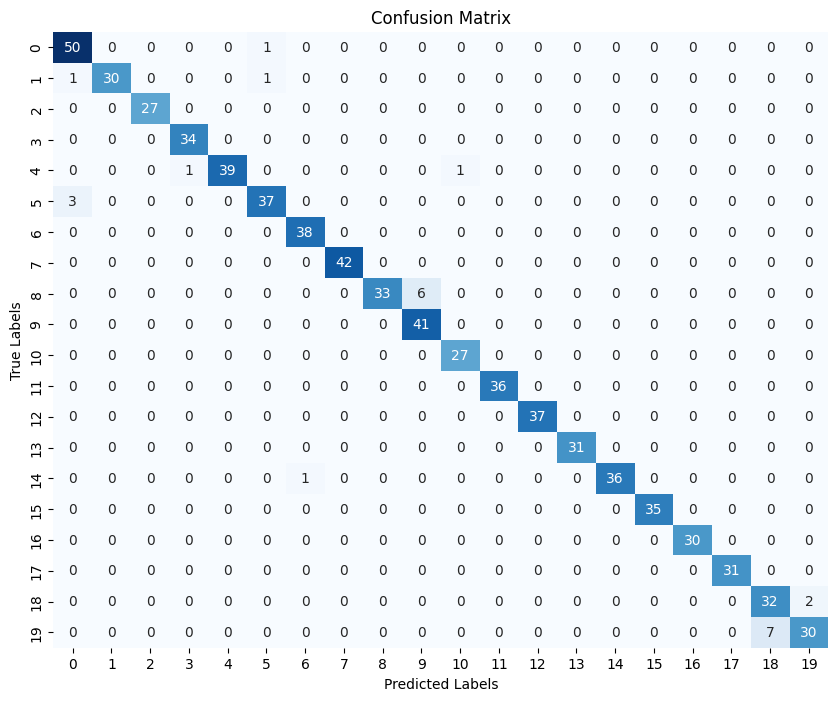

Recall: 0.9666666666666667
Precision: 0.9689052225765435
F1-Score: 0.9665766445704521
Accuracy: 0.9666666666666667


In [63]:
from keras.optimizers import Adam
# Cargar datos
with open('/kaggle/input/datatuberculoscortes/images_tuberculos_color.dat', 'rb') as f:
    images_data = pickle.load(f)

with open('/kaggle/input/datatuberculoscortes/labels_tuberculos.dat', 'rb') as f:
    labels = pickle.load(f)

# Convertir a formato numpy
X = np.array(images_data)
y = np.array(labels)

# Convertir las etiquetas a formato one-hot
y_one_hot = to_categorical(y)

# Normalizar los datos
X = X / 255.0

# Aumento de datos
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X)

# Crear modelo con hiperparámetros ajustados
cnn = Sequential()
cnn.add(Convolution2D(32, (3,3), padding='same', input_shape=(100, 100, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Convolution2D(64, (3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Convolution2D(128, (3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(20, activation='softmax'))

# Compilar modelo con hiperparámetros ajustados
cnn.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Dividir datos en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Entrenar modelo con aumento de datos y hiperparámetros ajustados
history = cnn.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=50, validation_data=(X_val, y_val))

# Calcular predicciones en el conjunto de validación
y_pred = cnn.predict(X_val)

# Convertir las predicciones a clases
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

# Calcular y mostrar métricas
precision = precision_score(y_val_classes, y_pred_classes, average='weighted')
recall = recall_score(y_val_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_val_classes, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_val_classes, y_pred_classes)

# Visualizar la matriz de confusión con Seaborn
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1)
print("Accuracy:", accuracy)


Epoch 1/50
90/90 [==============================] - 9s 82ms/step - loss: 2.9783 - accuracy: 0.0719 - val_loss: 2.6481 - val_accuracy: 0.1694
Epoch 2/50
90/90 [==============================] - 7s 77ms/step - loss: 2.6803 - accuracy: 0.1309 - val_loss: 2.2931 - val_accuracy: 0.1750
Epoch 3/50
90/90 [==============================] - 7s 78ms/step - loss: 2.4891 - accuracy: 0.1615 - val_loss: 2.1350 - val_accuracy: 0.2125
Epoch 4/50
90/90 [==============================] - 8s 84ms/step - loss: 2.3368 - accuracy: 0.1962 - val_loss: 1.9235 - val_accuracy: 0.3333
Epoch 5/50
90/90 [==============================] - 7s 79ms/step - loss: 2.1764 - accuracy: 0.2309 - val_loss: 1.6962 - val_accuracy: 0.4264
Epoch 6/50
90/90 [==============================] - 7s 78ms/step - loss: 2.0611 - accuracy: 0.2649 - val_loss: 1.5504 - val_accuracy: 0.4611
Epoch 7/50
90/90 [==============================] - 7s 80ms/step - loss: 1.9096 - accuracy: 0.3045 - val_loss: 1.4196 - val_accuracy: 0.5028
Epoch 8/50
90

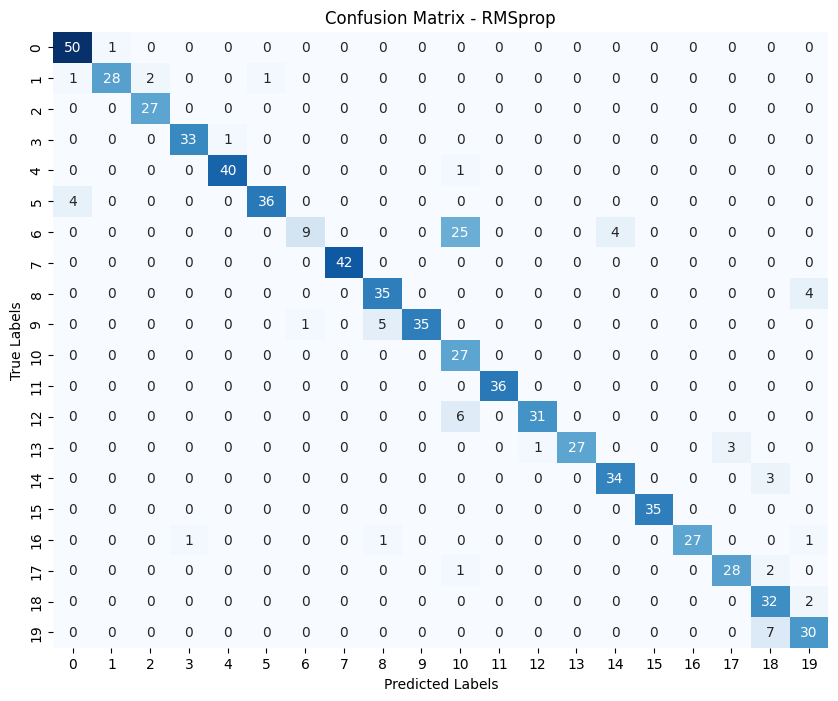

Recall (RMSprop): 0.8916666666666667
Precision (RMSprop): 0.9175500095182955
F1-Score (RMSprop): 0.8886096499624921
Accuracy (RMSprop): 0.8916666666666667


In [64]:
from keras.optimizers import RMSprop
# Cargar datos
with open('/kaggle/input/datatuberculoscortes/images_tuberculos_color.dat', 'rb') as f:
    images_data = pickle.load(f)

with open('/kaggle/input/datatuberculoscortes/labels_tuberculos.dat', 'rb') as f:
    labels = pickle.load(f)

# Convertir a formato numpy
X = np.array(images_data)
y = np.array(labels)

# Convertir las etiquetas a formato one-hot
y_one_hot = to_categorical(y)

# Normalizar los datos
X = X / 255.0

# Aumento de datos
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X)

# Crear modelo con RMSprop como algoritmo de optimización
cnn_rmsprop = Sequential()
cnn_rmsprop.add(Convolution2D(32, (3,3), padding='same', input_shape=(100, 100, 3), activation='relu'))
cnn_rmsprop.add(MaxPooling2D(pool_size=(2,2)))
cnn_rmsprop.add(Convolution2D(64, (3,3), padding='same', activation='relu'))
cnn_rmsprop.add(MaxPooling2D(pool_size=(2,2)))
cnn_rmsprop.add(Convolution2D(128, (3,3), padding='same', activation='relu'))
cnn_rmsprop.add(MaxPooling2D(pool_size=(2,2)))
cnn_rmsprop.add(Flatten())
cnn_rmsprop.add(Dense(512, activation='relu'))
cnn_rmsprop.add(Dropout(0.5))
cnn_rmsprop.add(Dense(256, activation='relu'))
cnn_rmsprop.add(Dropout(0.5))
cnn_rmsprop.add(Dense(64, activation='relu'))
cnn_rmsprop.add(Dropout(0.5))
cnn_rmsprop.add(Dense(20, activation='softmax'))

# Compilar modelo con RMSprop como algoritmo de optimización
cnn_rmsprop.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar modelo con aumento de datos y RMSprop
history_rmsprop = cnn_rmsprop.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=50, validation_data=(X_val, y_val))

# Calcular predicciones en el conjunto de validación
y_pred_rmsprop = cnn_rmsprop.predict(X_val)

# Convertir las predicciones a clases
y_pred_classes_rmsprop = np.argmax(y_pred_rmsprop, axis=1)
y_val_classes_rmsprop = np.argmax(y_val, axis=1)

# Calcular y mostrar métricas
precision_rmsprop = precision_score(y_val_classes_rmsprop, y_pred_classes_rmsprop, average='weighted')
recall_rmsprop = recall_score(y_val_classes_rmsprop, y_pred_classes_rmsprop, average='weighted')
f1_rmsprop = f1_score(y_val_classes_rmsprop, y_pred_classes_rmsprop, average='weighted')
accuracy_rmsprop = accuracy_score(y_val_classes_rmsprop, y_pred_classes_rmsprop)

# Visualizar la matriz de confusión con Seaborn
conf_matrix_rmsprop = confusion_matrix(y_val_classes_rmsprop, y_pred_classes_rmsprop)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rmsprop, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - RMSprop')
plt.show()

print("Recall (RMSprop):", recall_rmsprop)
print("Precision (RMSprop):", precision_rmsprop)
print("F1-Score (RMSprop):", f1_rmsprop)
print("Accuracy (RMSprop):", accuracy_rmsprop)

CORTES

Forma de las imágenes: (3600, 100, 100, 3)
Forma de las etiquetas (one-hot): (3600, 20)
Epoch 1/40
90/90 [==============================] - 10s 84ms/step - loss: 2.9619 - accuracy: 0.0500 - val_loss: 2.7762 - val_accuracy: 0.0931
Epoch 2/40
90/90 [==============================] - 7s 77ms/step - loss: 2.7312 - accuracy: 0.1000 - val_loss: 2.3929 - val_accuracy: 0.1097
Epoch 3/40
90/90 [==============================] - 7s 76ms/step - loss: 2.4514 - accuracy: 0.1476 - val_loss: 2.1287 - val_accuracy: 0.2125
Epoch 4/40
90/90 [==============================] - 7s 80ms/step - loss: 2.2509 - accuracy: 0.2007 - val_loss: 1.9740 - val_accuracy: 0.2417
Epoch 5/40
90/90 [==============================] - 7s 79ms/step - loss: 2.0393 - accuracy: 0.2472 - val_loss: 1.7690 - val_accuracy: 0.3431
Epoch 6/40
90/90 [==============================] - 7s 77ms/step - loss: 1.9601 - accuracy: 0.2715 - val_loss: 1.6629 - val_accuracy: 0.3472
Epoch 7/40
90/90 [==============================] - 7s 78ms/step 

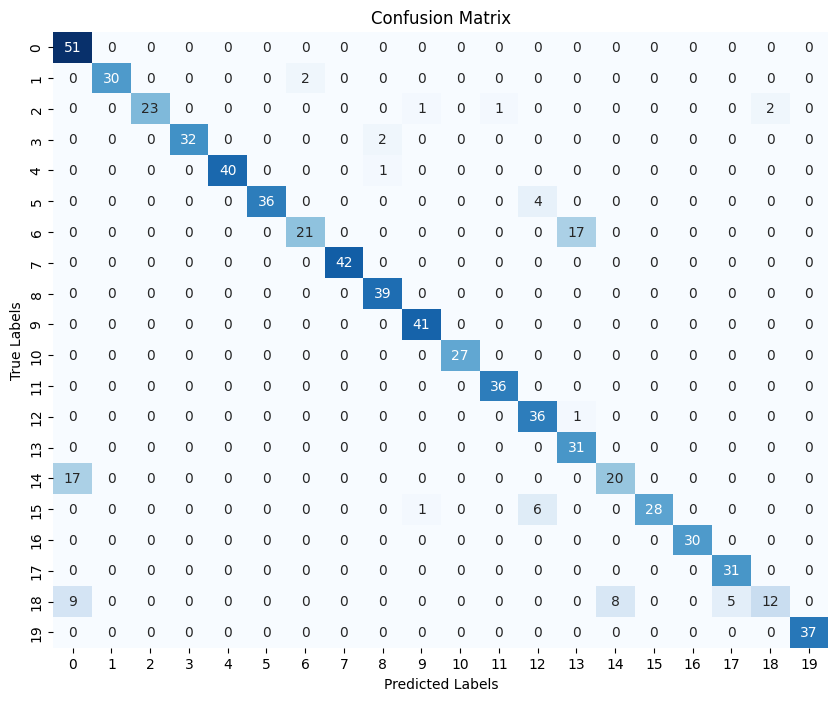

Recall: 0.8930555555555556
Precision: 0.9092275675044765
F1-Score: 0.8871459323821289
Accuracy: 0.8930555555555556


In [65]:
# Cargar datos
with open('/kaggle/input/datatuberculoscortes/images_cortes_color.dat', 'rb') as f:
    images_data = pickle.load(f)

with open('/kaggle/input/datatuberculoscortes/labels_tuberculos.dat', 'rb') as f:
    labels = pickle.load(f)

# Convertir a formato numpy
X = np.array(images_data)
y = np.array(labels)

# Convertir las etiquetas a formato one-hot
y_one_hot = to_categorical(y)

# Normalizar los datos
X = X / 255.0

# Verificar formas de las imágenes y las etiquetas
print("Forma de las imágenes:", X.shape)
print("Forma de las etiquetas (one-hot):", y_one_hot.shape)

# Aumento de datos
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X)

# Crear modelo
cnn = Sequential()
cnn.add(Convolution2D(32, (3,3), padding='same', input_shape=(100, 100, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Convolution2D(64, (2,2), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Convolution2D(128, (3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(20, activation='softmax'))

# Compilar modelo
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Dividir datos en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Entrenar modelo con aumento de datos
history = cnn.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=40, validation_data=(X_val, y_val))

# Calcular predicciones en el conjunto de validación
y_pred = cnn.predict(X_val)

# Convertir las predicciones a clases
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

# Calcular y mostrar métricas
precision = precision_score(y_val_classes, y_pred_classes, average='weighted')
recall = recall_score(y_val_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_val_classes, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_val_classes, y_pred_classes)

# Visualizar la matriz de confusión con Seaborn
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1)
print("Accuracy:", accuracy)

Epoch 1/50
90/90 [==============================] - 9s 81ms/step - loss: 3.0046 - accuracy: 0.0500 - val_loss: 2.9961 - val_accuracy: 0.0417
Epoch 2/50
90/90 [==============================] - 7s 78ms/step - loss: 2.9972 - accuracy: 0.0424 - val_loss: 2.9973 - val_accuracy: 0.0403
Epoch 3/50
90/90 [==============================] - 7s 81ms/step - loss: 2.8779 - accuracy: 0.0788 - val_loss: 2.4837 - val_accuracy: 0.0972
Epoch 4/50
90/90 [==============================] - 7s 80ms/step - loss: 2.5315 - accuracy: 0.1111 - val_loss: 2.3240 - val_accuracy: 0.1181
Epoch 5/50
90/90 [==============================] - 7s 79ms/step - loss: 2.3779 - accuracy: 0.1434 - val_loss: 2.1099 - val_accuracy: 0.1792
Epoch 6/50
90/90 [==============================] - 7s 77ms/step - loss: 2.2509 - accuracy: 0.1899 - val_loss: 1.8702 - val_accuracy: 0.2611
Epoch 7/50
90/90 [==============================] - 7s 80ms/step - loss: 2.1019 - accuracy: 0.2243 - val_loss: 1.8596 - val_accuracy: 0.2611
Epoch 8/50
90

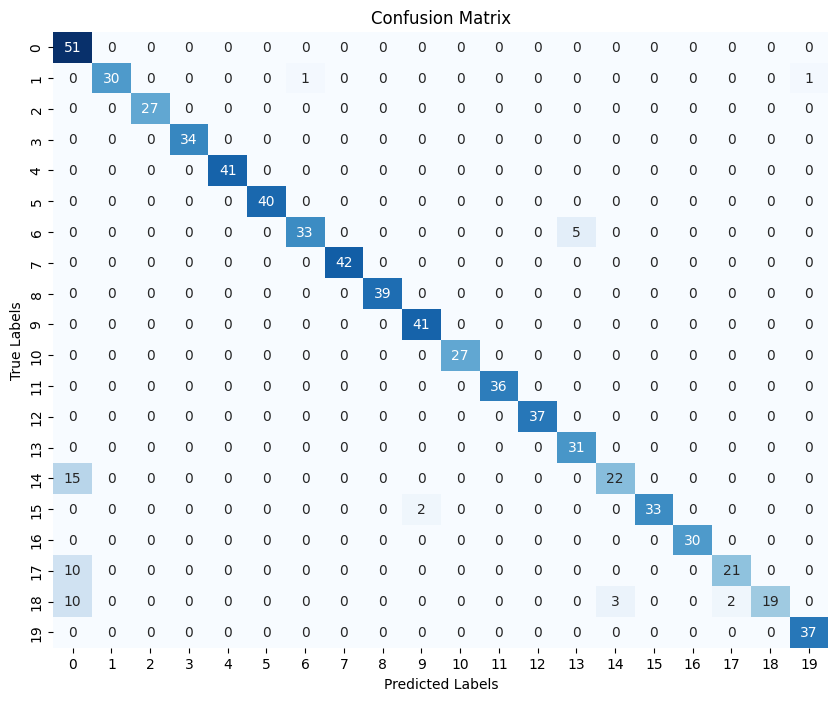

Recall: 0.9319444444444445
Precision: 0.949728708754871
F1-Score: 0.931536172078168
Accuracy: 0.9319444444444445


In [66]:
from keras.optimizers import Adam
# Cargar datos
with open('/kaggle/input/datatuberculoscortes/images_cortes_color.dat', 'rb') as f:
    images_data = pickle.load(f)

with open('/kaggle/input/datatuberculoscortes/labels_tuberculos.dat', 'rb') as f:
    labels = pickle.load(f)

# Convertir a formato numpy
X = np.array(images_data)
y = np.array(labels)

# Convertir las etiquetas a formato one-hot
y_one_hot = to_categorical(y)

# Normalizar los datos
X = X / 255.0

# Aumento de datos
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X)

# Crear modelo con hiperparámetros ajustados
cnn = Sequential()
cnn.add(Convolution2D(32, (3,3), padding='same', input_shape=(100, 100, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Convolution2D(64, (3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Convolution2D(128, (3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(20, activation='softmax'))

# Compilar modelo con hiperparámetros ajustados
cnn.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Dividir datos en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Entrenar modelo con aumento de datos y hiperparámetros ajustados
history = cnn.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=50, validation_data=(X_val, y_val))

# Calcular predicciones en el conjunto de validación
y_pred = cnn.predict(X_val)

# Convertir las predicciones a clases
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

# Calcular y mostrar métricas
precision = precision_score(y_val_classes, y_pred_classes, average='weighted')
recall = recall_score(y_val_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_val_classes, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_val_classes, y_pred_classes)

# Visualizar la matriz de confusión con Seaborn
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Recall:", recall)
print("Precision:", precision)
print("F1-Score:", f1)
print("Accuracy:", accuracy)


Epoch 1/50
90/90 [==============================] - 9s 81ms/step - loss: 3.0171 - accuracy: 0.0615 - val_loss: 2.8632 - val_accuracy: 0.0944
Epoch 2/50
90/90 [==============================] - 7s 76ms/step - loss: 2.7802 - accuracy: 0.1045 - val_loss: 2.6386 - val_accuracy: 0.1153
Epoch 3/50
90/90 [==============================] - 7s 77ms/step - loss: 2.5747 - accuracy: 0.1292 - val_loss: 2.2315 - val_accuracy: 0.1792
Epoch 4/50
90/90 [==============================] - 7s 77ms/step - loss: 2.4319 - accuracy: 0.1486 - val_loss: 2.2105 - val_accuracy: 0.1903
Epoch 5/50
90/90 [==============================] - 7s 76ms/step - loss: 2.3309 - accuracy: 0.1705 - val_loss: 2.2374 - val_accuracy: 0.2250
Epoch 6/50
90/90 [==============================] - 7s 77ms/step - loss: 2.2448 - accuracy: 0.2049 - val_loss: 1.9585 - val_accuracy: 0.2819
Epoch 7/50
90/90 [==============================] - 7s 77ms/step - loss: 2.0964 - accuracy: 0.2313 - val_loss: 1.6758 - val_accuracy: 0.3792
Epoch 8/50
90

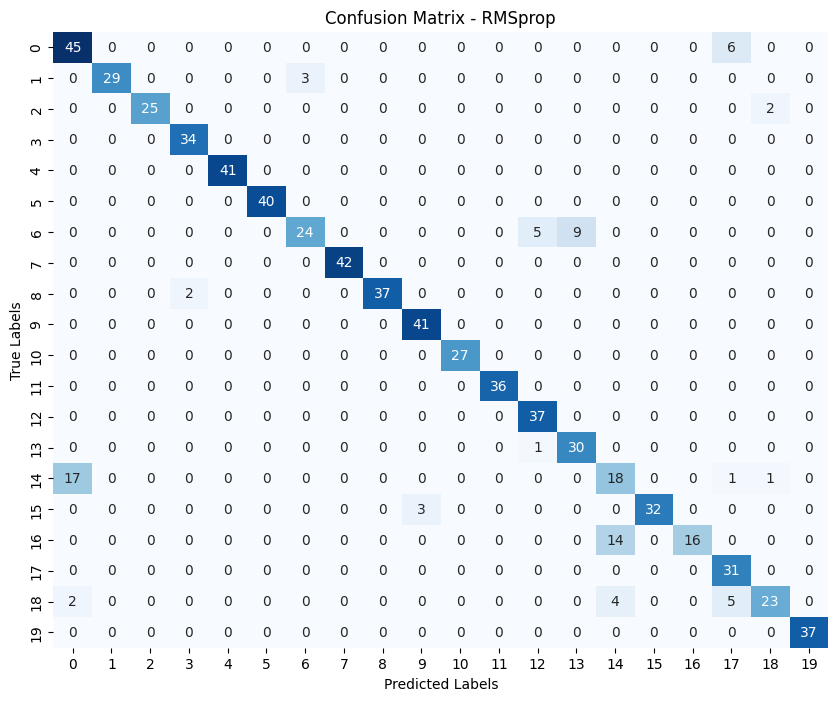

Recall (RMSprop): 0.8958333333333334
Precision (RMSprop): 0.9063360177474157
F1-Score (RMSprop): 0.8934758212735049
Accuracy (RMSprop): 0.8958333333333334


In [67]:
from keras.optimizers import RMSprop
# Cargar datos
with open('/kaggle/input/datatuberculoscortes/images_cortes_color.dat', 'rb') as f:
    images_data = pickle.load(f)

with open('/kaggle/input/datatuberculoscortes/labels_tuberculos.dat', 'rb') as f:
    labels = pickle.load(f)

# Convertir a formato numpy
X = np.array(images_data)
y = np.array(labels)

# Convertir las etiquetas a formato one-hot
y_one_hot = to_categorical(y)

# Normalizar los datos
X = X / 255.0

# Aumento de datos
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X)

# Crear modelo con RMSprop como algoritmo de optimización
cnn_rmsprop = Sequential()
cnn_rmsprop.add(Convolution2D(32, (3,3), padding='same', input_shape=(100, 100, 3), activation='relu'))
cnn_rmsprop.add(MaxPooling2D(pool_size=(2,2)))
cnn_rmsprop.add(Convolution2D(64, (3,3), padding='same', activation='relu'))
cnn_rmsprop.add(MaxPooling2D(pool_size=(2,2)))
cnn_rmsprop.add(Convolution2D(128, (3,3), padding='same', activation='relu'))
cnn_rmsprop.add(MaxPooling2D(pool_size=(2,2)))
cnn_rmsprop.add(Flatten())
cnn_rmsprop.add(Dense(512, activation='relu'))
cnn_rmsprop.add(Dropout(0.5))
cnn_rmsprop.add(Dense(256, activation='relu'))
cnn_rmsprop.add(Dropout(0.5))
cnn_rmsprop.add(Dense(64, activation='relu'))
cnn_rmsprop.add(Dropout(0.5))
cnn_rmsprop.add(Dense(20, activation='softmax'))

# Compilar modelo con RMSprop como algoritmo de optimización
cnn_rmsprop.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar modelo con aumento de datos y RMSprop
history_rmsprop = cnn_rmsprop.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=50, validation_data=(X_val, y_val))

# Calcular predicciones en el conjunto de validación
y_pred_rmsprop = cnn_rmsprop.predict(X_val)

# Convertir las predicciones a clases
y_pred_classes_rmsprop = np.argmax(y_pred_rmsprop, axis=1)
y_val_classes_rmsprop = np.argmax(y_val, axis=1)

# Calcular y mostrar métricas
precision_rmsprop = precision_score(y_val_classes_rmsprop, y_pred_classes_rmsprop, average='weighted')
recall_rmsprop = recall_score(y_val_classes_rmsprop, y_pred_classes_rmsprop, average='weighted')
f1_rmsprop = f1_score(y_val_classes_rmsprop, y_pred_classes_rmsprop, average='weighted')
accuracy_rmsprop = accuracy_score(y_val_classes_rmsprop, y_pred_classes_rmsprop)

# Visualizar la matriz de confusión con Seaborn
conf_matrix_rmsprop = confusion_matrix(y_val_classes_rmsprop, y_pred_classes_rmsprop)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rmsprop, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - RMSprop')
plt.show()

print("Recall (RMSprop):", recall_rmsprop)
print("Precision (RMSprop):", precision_rmsprop)
print("F1-Score (RMSprop):", f1_rmsprop)
print("Accuracy (RMSprop):", accuracy_rmsprop)